アドバイスしてもらったった

* そもそもなんで間違っていたの？ 精度が落ちているの？
    * 間違っているところの特徴をplotしてみよう
    * その特徴にきく変数を用意してみよう
* 変数によっては下げる要因になる場合もある（ノイズ）
* 間違ったものだけでモデルを作成する方法もあり
    * outputされた結果を最後ガッチャンコする必要がある

さらに＋な情報

試しにkaggleにオール0とオール1で投げてみたらこんな感じ

* 全員生存: 0.37321  
* 全員死亡: 0.62679

そもそも、生存の比率は小さいので、作成したモデルがそこにいたっていなきゃ間違いということになる。  
それを踏まえた上で良いモデルを作る。

In [163]:
# いつも使うやつ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interp
import seaborn as sns

# pandasで全ての列を表示
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 図をipython notebook内で表示
%matplotlib inline

# DeplicatedWarningを避けるため
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

import sys
sys.path.append('./lib/')

# 交差検定をサクッとやるためのモジュールを読み込む
from sklearn.cross_validation import cross_val_score

# 説明変数つくるための関数
import feature_process_helper
import get_data
import learn

# submissionを書き込む関数
import write_submission

In [2]:
# データをそれぞれ読み込む
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [3]:
train, test = feature_process_helper.names(train, test)
train, test = feature_process_helper.age_impute(train, test)
train, test = feature_process_helper.dummies(train, test, columns=['Pclass', 'Sex', 'Embarked'])
trian, test = feature_process_helper.family_size_int(train, test)
# train, test = feature_process_helper.drop(train, test, bye=['SibSp', 'Parch', 'Ticket', 'Cabin', 'Name_Title', 'Pclass_3', 'Sex_male', 'Embarked_Q'])
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [4]:
x_train = train[['Sex_female', 'Fare', 'Age']]
x_test = test[['Sex_female', 'Fare', 'Age']]
y_train = train['Survived']

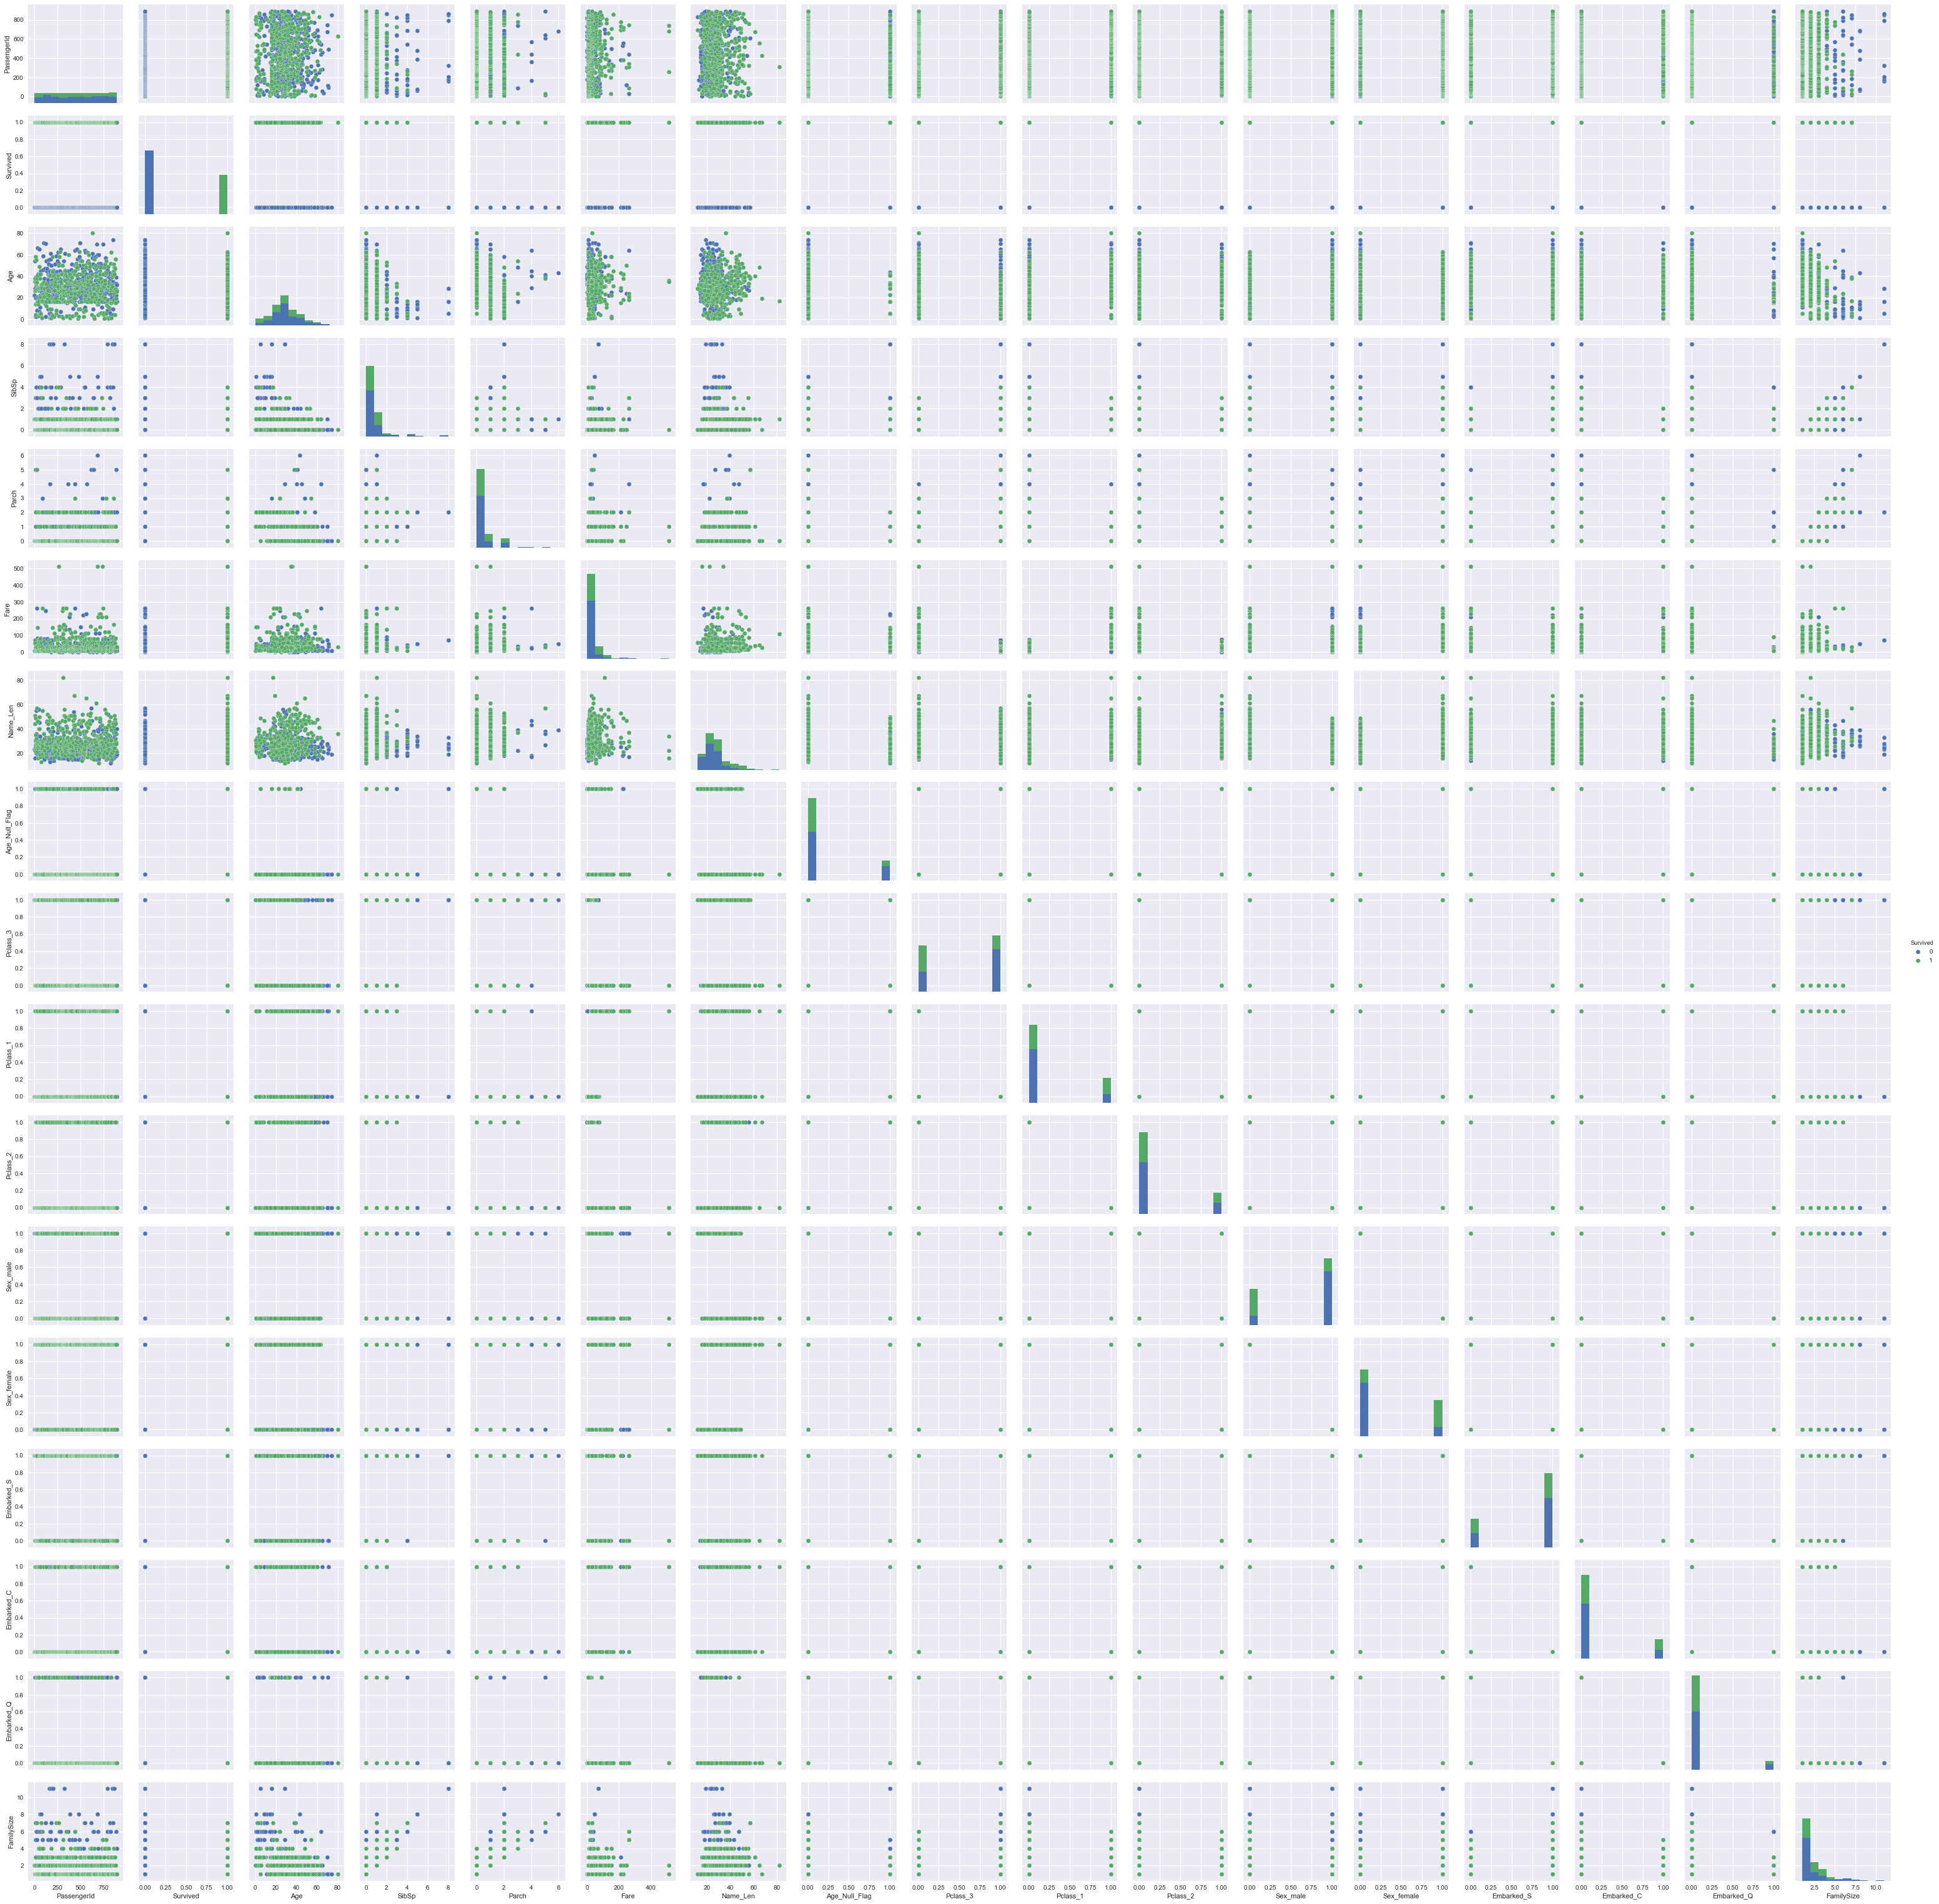

In [332]:
sns.pairplot(train, hue='Survived')

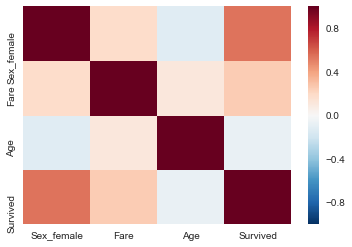

In [166]:
sns.heatmap(train[['Sex_female', 'Fare', 'Age', 'Survived']].corr())

In [7]:
search = learn.search(x_train, y_train)
model = learn.learn(x_train, y_train, parameter=search.best_params_)

In [8]:
search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [9]:
y_train[y_train == model.predict(x_train)].count() / len(y_train)

0.91582491582491588

In [10]:
submission_df.loc[submission_df['Survived'] == model.predict(x_test), 'Survived'].count() / len(submission_df)

0.88277511961722488

In [11]:
cv_scores = cross_val_score(model, x_train, y_train, cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.807 +/- 0.040


In [12]:
cv_scores.mean()

0.80703665872205188

In [13]:
model.predict(x_train)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [14]:
# 二値分類をやる
pre_core_df = pd.DataFrame({'correct': y_train, 'predict':  model.predict(x_train)})

len(pre_core_df)

891

In [15]:
# 正解した結果
# 正解だった
_all_correct = pre_core_df[pre_core_df['correct'] == pre_core_df['predict']]['predict'].count()
# 正解で生存していたを当てた
_correct_survival = pre_core_df[(pre_core_df['correct'] == pre_core_df['predict']) & (1 == pre_core_df['predict'])]['predict'].count()
# 正解で死亡を当てた
_correct_dead = pre_core_df[(pre_core_df['correct'] == pre_core_df['predict']) & (0 == pre_core_df['predict'])]['predict'].count()
# 生存と予測したけど、死亡してた
_unexpected = pre_core_df[(pre_core_df['correct'] != pre_core_df['predict']) & (0 != pre_core_df['predict'])]['predict'].count()
# 死亡と予測したけど、生存してた
_missing = pre_core_df[(pre_core_df['correct'] != pre_core_df['predict']) & (1 != pre_core_df['predict'])]['predict'].count()

In [16]:
print('正解: %d' % _all_correct)
print('正解で生存を当てた: %d' % _correct_survival)
print('正解で死亡を当てた: %d' % _correct_dead)
print('予期しない: %d' % _unexpected)
print('欠落した: %d'% _missing)
print('間違い: %d' % (_unexpected + _missing))

正解: 816
正解で生存を当てた: 294
正解で死亡を当てた: 522
予期しない: 27
欠落した: 48
間違い: 75


* 取りこぼしがあるが、結果に誤りがない => 「precision（適合率が高い）」  => 結果の中にどれくらい正解が多いか
* 結果に誤りがあるが、取りこぼしはない => 「recall（再現率が高い）」 => 正解のうちどの程度が検索にヒットするか
* F値 = （2×適合率×再現率）/（適合率＋再現率）

In [17]:
# 関数があった
from sklearn.metrics import confusion_matrix
confusion_matrix(pre_core_df['correct'], pre_core_df['predict'])

array([[522,  27],
       [ 48, 294]])

In [18]:
from sklearn import metrics
# 適合率、再現率、F-値(F-measure)
print('適合率: %f' % metrics.precision_score(pre_core_df['correct'], pre_core_df['predict']))
print('再現率: %f' % metrics.recall_score(pre_core_df['correct'], pre_core_df['predict']))
print('F値: %f' % metrics.f1_score(pre_core_df['correct'], pre_core_df['predict']))

適合率: 0.915888
再現率: 0.859649
F値: 0.886878


In [110]:
from sklearn.cross_validation import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [5, 6]])
y = np.array([0, 0, 1, 1, 0])
skf = StratifiedKFold(y, n_folds=2)
for train_index, test_index in skf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [3 4] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4]


仮説立て

* 生存と死亡の率は偏ってそうなので、死亡率が高い変数を探すのもあり？
* カテゴリカルなデータが多いので、前処理しながらクロス集計で生存率を見てみる
    * 決定木ってクロス集計のループ版っぽいので、それで確認するのもあり（かも）
* 一個作ったモデルでスコアの正答率を見る
    * スコア
        * 正解で生存を当てた: 273
        * 正解で死亡を当てた: 511
        * 予期しない(予測0で1だった): 38
        * 欠落した(予測1で0だった): 69
        * 間違い: 107
    * 上記それぞれを単位あわせて比較して、変数の差分を確認してみる
* お金持ちは生存しやすい？
* 部屋によっては生存と死亡率がある？
* 家族がいないと優先されなかったとか、家族が多いと死亡率が逆に上がったりする？
    * 女性の家族がいると優先されるから生存率があがる？
* 子供は優先されたから年齢が低いほうが生存率あがる？

In [19]:
# データをそれぞれ読み込む
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

train, test = feature_process_helper.names(train, test)
train, test = feature_process_helper.age_impute(train, test)
train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = feature_process_helper.drop(train, test, bye = ['Ticket'])

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Len',
       'Age_Null_Flag', 'Cabin_num_[2, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Cabin_Letter_n', 'Cabin_Letter_C', 'Cabin_Letter_E',
       'Cabin_Letter_G', 'Cabin_Letter_D', 'Cabin_Letter_A', 'Cabin_Letter_B',
       'Cabin_Letter_F', 'Name_Title_Mr.', 'Name_Title_Mrs.',
       'Name_Title_Miss.', 'Name_Title_Master.', 'Name_Title_Rev.',
       'Name_Title_Dr.', 'Name_Title_Ms.', 'Name_Title_Col.',
       'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [21]:
target_parameter = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_3', 'Pclass_1', 'Sex_male', 'Embarked_C', 'Embarked_Q']

In [22]:
# 決定木で効いてそうなのを確認する
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=5)
tree_model.fit(train.loc[:, target_parameter], train.iloc[:, 1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

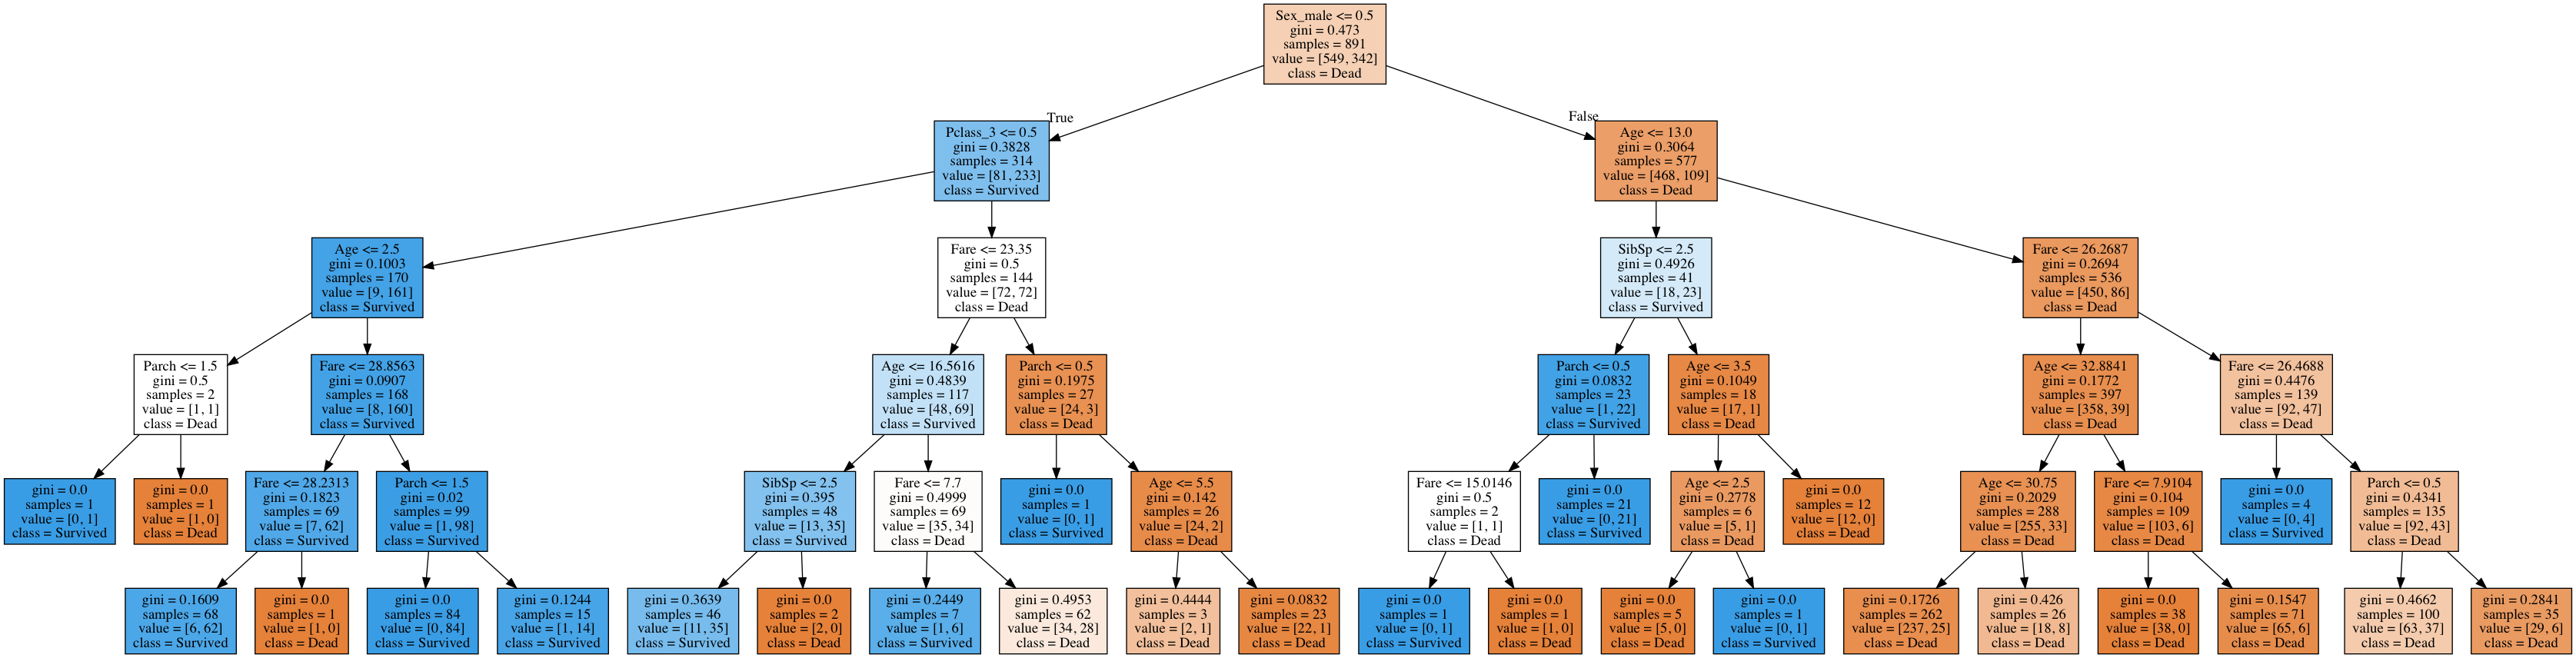

In [23]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(tree_model, out_file=dot_data, feature_names=target_parameter, class_names=['Dead', 'Survived'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
# ランダムフォレストでも確認する

model = learn.learn(train.loc[:, target_parameter], train.iloc[:, 1], parameter=search.best_params_)

In [26]:
cv_scores = cross_val_score(model, train.loc[:, target_parameter], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.838 +/- 0.054


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train.iloc[:, 1], tree_model.predict(train.loc[:, target_parameter]))

array([[530,  19],
       [112, 230]])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train.iloc[:, 1], model.predict(train.loc[:, target_parameter]))

array([[529,  20],
       [ 58, 284]])

In [28]:
cv_scores = cross_val_score(tree_model, train.loc[:, target_parameter], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.803 +/- 0.043


In [45]:
from sklearn import metrics
# 適合率、再現率、F-値(F-measure)
print('適合率: %f' % metrics.precision_score(train.iloc[:, 1], tree_model.predict(train.loc[:, target_parameter])))
print('再現率: %f' % metrics.recall_score(train.iloc[:, 1], tree_model.predict(train.loc[:, target_parameter])))
print('F値: %f' % metrics.f1_score(train.iloc[:, 1], tree_model.predict(train.loc[:, target_parameter])))

適合率: 0.923695
再現率: 0.672515
F値: 0.778342


In [30]:
from sklearn import metrics
# 適合率、再現率、F-値(F-measure)
print('適合率: %f' % metrics.precision_score(train.iloc[:, 1], model.predict(train.loc[:, target_parameter])))
print('再現率: %f' % metrics.recall_score(train.iloc[:, 1], model.predict(train.loc[:, target_parameter])))
print('F値: %f' % metrics.f1_score(train.iloc[:, 1], model.predict(train.loc[:, target_parameter])))

適合率: 0.934211
再現率: 0.830409
F値: 0.879257


In [31]:
def get_correct_and_predict_df(_correct, _predict):
    return pd.DataFrame({'correct': _correct, 'predict':  _predict})

def correct_answer(_correct, _predict):
    pre_core_df = get_correct_and_predict_df(_correct, _predict)
    correct = pre_core_df['correct']
    predict = pre_core_df['predict']
    # 正解した結果
    # 正解だった
    _all_correct = pre_core_df[correct == predict]['predict'].count()
    # 正解で生存していたを当てた
    _correct_survival = pre_core_df[(correct == predict) & (1 == predict)]['predict'].count()
    # 正解で死亡を当てた
    _correct_dead = pre_core_df[(correct == predict) & (0 == predict)]['predict'].count()
    # 死亡と予測したけど、生存してた
    _unexpected = pre_core_df[(correct != predict) & (0 != predict)]['predict'].count()
    # 生存と予測したけど、死亡してた
    _missing = pre_core_df[(correct != predict) & (1 != predict)]['predict'].count()
    print('正解: %d' % _all_correct)
    print('正解で生存を当てた: %d' % _correct_survival)
    print('正解で死亡を当てた: %d' % _correct_dead)
    print('予期しない: %d' % _missing)
    print('欠落した: %d'% _unexpected)
    print('間違い: %d' % (_unexpected + _missing))

In [32]:
correct_answer(train.loc[:, 'Survived'], tree_model.predict(train.loc[:, target_parameter]))

正解: 760
正解で生存を当てた: 230
正解で死亡を当てた: 530
予期しない: 112
欠落した: 19
間違い: 131


In [33]:
correct_answer(train.loc[:, 'Survived'], model.predict(train.loc[:, target_parameter]))

正解: 813
正解で生存を当てた: 284
正解で死亡を当てた: 529
予期しない: 58
欠落した: 20
間違い: 78


ランダムフォレストのほうが精度よさそう

In [34]:
pre_core_df = get_correct_and_predict_df(train.loc[:, 'Survived'], tree_model.predict(train.loc[:, target_parameter]))

In [35]:
correct = pre_core_df['correct']
predict = pre_core_df['predict']

tp = train.iloc[pre_core_df[(correct == predict) & (1 == predict)].index, ]
tn = train.iloc[pre_core_df[(correct == predict) & (0 == predict)].index, ]
fp = train.iloc[pre_core_df[(correct != predict) & (0 != predict)].index, ]
fn = train.iloc[pre_core_df[(correct != predict) & (1 != predict)].index, ]

print(tp['Survived'].count(), ':', tn['Survived'].count(), ':', fp['Survived'].count(), ':', fn['Survived'].count())

230 : 530 : 19 : 112


In [100]:
fp.describe()

PassengerId  Survived        Age      SibSp      Parch        Fare  \
count    19.000000      19.0  19.000000  19.000000  19.000000   19.000000   
mean    419.263158       0.0  21.650648   0.368421   0.368421   19.849347   
std     267.734703       0.0  12.831579   0.495595   0.683986   32.451732   
min      15.000000       0.0   2.000000   0.000000   0.000000    6.750000   
25%     221.000000       0.0  16.123188   0.000000   0.000000    7.802100   
50%     358.000000       0.0  16.123188   0.000000   0.000000   10.500000   
75%     624.500000       0.0  25.500000   1.000000   0.500000   14.850000   
max     855.000000       0.0  57.000000   1.000000   2.000000  151.550000   

        Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  19.000000      19.000000              19.000000   
mean   29.578947       0.368421               0.105263   
std    11.036887       0.495595               0.315302   
min    17.000000       0.000000               0.000000   
25%    20.500000       0.000000               0.000000   
50%    28.000000       0.000000               0.000000   
75%    36.500000       1.000000               0.000000   
max    56.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                        19.0                19.000000   19.000000   
mean                          0.0                 0.052632    6.684211   
std                           0.0                 0.229416    3.037774   
min                           0.0                 0.000000    4.000000   
25%                           0.0                 0.000000    6.000000   
50%                           0.0                 0.000000    6.000000   
75%                           0.0                 0.000000    6.000000   
max                           0.0                 1.000000   17.000000   

        Pclass_3   Pclass_1   Pclass_2  Sex_male  Sex_female  Embarked_S  \
count  19.000000  19.000000  19.000000      19.0        19.0   19.000000   
mean    0.631579   0.052632   0.315789       0.0         1.0    0.578947   
std     0.495595   0.229416   0.477567       0.0         0.0    0.507257   
min     0.000000   0.000000   0.000000       0.0         1.0    0.000000   
25%     0.000000   0.000000   0.000000       0.0         1.0    0.000000   
50%     1.000000   0.000000   0.000000       0.0         1.0    1.000000   
75%     1.000000   0.000000   1.000000       0.0         1.0    1.000000   
max     1.000000   1.000000   1.000000       0.0         1.0    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count   19.000000   19.000000       19.000000       19.000000       19.000000   
mean     0.157895    0.263158        0.842105        0.052632        0.052632   
std      0.374634    0.452414        0.374634        0.229416        0.229416   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        1.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      0.000000    0.500000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count       19.000000            19.0            19.0            19.0   
mean         0.052632             0.0             0.0             0.0   
std          0.229416             0.0             0.0             0.0   
min          0.000000             0.0             0.0             0.0   
25%          0.000000             0.0             0.0             0.0   
50%          0.000000             0.0             0.0             0.0   
75%          0.000000             0.0             0.0             0.0   
max          1.000000             0.0             0.0             0.0   

       Cabin_Letter_F  Name_Title_Mr.  Name_Title_

In [104]:
fn.describe() 

PassengerId  Survived         Age       SibSp       Parch        Fare  \
count   112.000000     112.0  112.000000  112.000000  112.000000  112.000000   
mean    432.812500       1.0   32.192623    0.366071    0.294643   35.581065   
std     250.574278       0.0   11.287886    0.735160    0.766863   69.707863   
min       3.000000       1.0    5.000000    0.000000    0.000000    0.000000   
25%     224.000000       1.0   25.750000    0.000000    0.000000    8.018750   
50%     446.500000       1.0   30.000000    0.000000    0.000000   15.975000   
75%     635.750000       1.0   36.250000    1.000000    0.000000   31.387500   
max     890.000000       1.0   80.000000    4.000000    5.000000  512.329200   

         Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  112.000000     112.000000             112.000000   
mean    27.580357       0.160714               0.107143   
std      9.940941       0.368918               0.310685   
min     12.000000       0.000000               0.000000   
25%     21.000000       0.000000               0.000000   
50%     25.500000       0.000000               0.000000   
75%     31.000000       0.000000               0.000000   
max     57.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                  112.000000               112.000000  112.000000   
mean                     0.125000                 0.089286    6.821429   
std                      0.332205                 0.286437    3.377761   
min                      0.000000                 0.000000    4.000000   
25%                      0.000000                 0.000000    5.000000   
50%                      0.000000                 0.000000    6.000000   
75%                      0.000000                 0.000000    6.000000   
max                      1.000000                 1.000000   17.000000   

         Pclass_3    Pclass_1    Pclass_2    Sex_male  Sex_female  Embarked_S  \
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
mean     0.589286    0.339286    0.071429    0.732143    0.267857    0.705357   
std      0.494175    0.475595    0.258697    0.444833    0.444833    0.457931   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count  112.000000  112.000000      112.000000      112.000000      112.000000   
mean     0.241071    0.053571        0.678571        0.089286        0.053571   
std      0.429656    0.226182        0.469124        0.286437        0.226182   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        0.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      0.000000    0.000000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count      112.000000      112.000000      112.000000      112.000000   
mean         0.008929        0.062500        0.044643        0.062500   
std          0.094491        0.243149        0.207447        0.243149   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000      

In [106]:
 fp.describe()

PassengerId  Survived        Age      SibSp      Parch        Fare  \
count    19.000000      19.0  19.000000  19.000000  19.000000   19.000000   
mean    419.263158       0.0  21.650648   0.368421   0.368421   19.849347   
std     267.734703       0.0  12.831579   0.495595   0.683986   32.451732   
min      15.000000       0.0   2.000000   0.000000   0.000000    6.750000   
25%     221.000000       0.0  16.123188   0.000000   0.000000    7.802100   
50%     358.000000       0.0  16.123188   0.000000   0.000000   10.500000   
75%     624.500000       0.0  25.500000   1.000000   0.500000   14.850000   
max     855.000000       0.0  57.000000   1.000000   2.000000  151.550000   

        Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  19.000000      19.000000              19.000000   
mean   29.578947       0.368421               0.105263   
std    11.036887       0.495595               0.315302   
min    17.000000       0.000000               0.000000   
25%    20.500000       0.000000               0.000000   
50%    28.000000       0.000000               0.000000   
75%    36.500000       1.000000               0.000000   
max    56.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                        19.0                19.000000   19.000000   
mean                          0.0                 0.052632    6.684211   
std                           0.0                 0.229416    3.037774   
min                           0.0                 0.000000    4.000000   
25%                           0.0                 0.000000    6.000000   
50%                           0.0                 0.000000    6.000000   
75%                           0.0                 0.000000    6.000000   
max                           0.0                 1.000000   17.000000   

        Pclass_3   Pclass_1   Pclass_2  Sex_male  Sex_female  Embarked_S  \
count  19.000000  19.000000  19.000000      19.0        19.0   19.000000   
mean    0.631579   0.052632   0.315789       0.0         1.0    0.578947   
std     0.495595   0.229416   0.477567       0.0         0.0    0.507257   
min     0.000000   0.000000   0.000000       0.0         1.0    0.000000   
25%     0.000000   0.000000   0.000000       0.0         1.0    0.000000   
50%     1.000000   0.000000   0.000000       0.0         1.0    1.000000   
75%     1.000000   0.000000   1.000000       0.0         1.0    1.000000   
max     1.000000   1.000000   1.000000       0.0         1.0    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count   19.000000   19.000000       19.000000       19.000000       19.000000   
mean     0.157895    0.263158        0.842105        0.052632        0.052632   
std      0.374634    0.452414        0.374634        0.229416        0.229416   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        1.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      0.000000    0.500000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count       19.000000            19.0            19.0            19.0   
mean         0.052632             0.0             0.0             0.0   
std          0.229416             0.0             0.0             0.0   
min          0.000000             0.0             0.0             0.0   
25%          0.000000             0.0             0.0             0.0   
50%          0.000000             0.0             0.0             0.0   
75%          0.000000             0.0             0.0             0.0   
max          1.000000             0.0             0.0             0.0   

       Cabin_Letter_F  Name_Title_Mr.  Name_Title_

In [105]:
fn.describe() - fp.describe()

PassengerId  Survived        Age      SibSp      Parch        Fare  \
count    93.000000      93.0  93.000000  93.000000  93.000000   93.000000   
mean     13.549342       1.0  10.541974  -0.002350  -0.073778   15.731718   
std     -17.160425       0.0  -1.543693   0.239565   0.082878   37.256131   
min     -12.000000       1.0   3.000000   0.000000   0.000000   -6.750000   
25%       3.000000       1.0   9.626812   0.000000   0.000000    0.216650   
50%      88.500000       1.0  13.876812   0.000000   0.000000    5.475000   
75%      11.250000       1.0  10.750000   0.000000  -0.500000   16.537500   
max      35.000000       1.0  23.000000   3.000000   3.000000  360.779200   

        Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  93.000000      93.000000              93.000000   
mean   -1.998590      -0.207707               0.001880   
std    -1.095945      -0.126677              -0.004617   
min    -5.000000       0.000000               0.000000   
25%     0.500000       0.000000               0.000000   
50%    -2.500000       0.000000               0.000000   
75%    -5.500000      -1.000000               0.000000   
max     1.000000       0.000000               0.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                   93.000000                93.000000   93.000000   
mean                     0.125000                 0.036654    0.137218   
std                      0.332205                 0.057022    0.339987   
min                      0.000000                 0.000000    0.000000   
25%                      0.000000                 0.000000   -1.000000   
50%                      0.000000                 0.000000    0.000000   
75%                      0.000000                 0.000000    0.000000   
max                      1.000000                 0.000000    0.000000   

        Pclass_3   Pclass_1   Pclass_2   Sex_male  Sex_female  Embarked_S  \
count  93.000000  93.000000  93.000000  93.000000   93.000000   93.000000   
mean   -0.042293   0.286654  -0.244361   0.732143   -0.732143    0.126410   
std    -0.001420   0.246179  -0.218870   0.444833    0.444833   -0.049326   
min     0.000000   0.000000   0.000000   0.000000   -1.000000    0.000000   
25%     0.000000   0.000000   0.000000   0.000000   -1.000000    0.000000   
50%     0.000000   0.000000   0.000000   1.000000   -1.000000    0.000000   
75%     0.000000   1.000000  -1.000000   1.000000    0.000000    0.000000   
max     0.000000   0.000000   0.000000   1.000000    0.000000    0.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count   93.000000   93.000000       93.000000       93.000000       93.000000   
mean     0.083177   -0.209586       -0.163534        0.036654        0.000940   
std      0.055022   -0.226232        0.094490        0.057022       -0.003234   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000       -1.000000        0.000000        0.000000   
50%      0.000000    0.000000        0.000000        0.000000        0.000000   
75%      0.000000   -0.500000        0.000000        0.000000        0.000000   
max      0.000000    0.000000        0.000000        0.000000        0.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count       93.000000       93.000000       93.000000       93.000000   
mean        -0.043703        0.062500        0.044643        0.062500   
std         -0.134925        0.243149        0.207447        0.243149   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          0.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_F  Name_Title_Mr.  Na

* Parchが多いと死亡を外しやすい？
* 生存を外したのは全部女性
* 生存を外した結果(fp)で、Cabin_Letter_D,A,B,Fは該当せず、C,E,Gにいた
* 生存を外した結果(fp)で、敬称から未婚と既婚の女性の２つに該当 => Msは未婚とわず女性という意味らしい
* 生存を外した結果(fp）で、Fam_Size_Big（親子・兄弟が4人以上）が0 => ソロか家族が3人以下の人たち

In [111]:
fn.describe() 

PassengerId  Survived         Age       SibSp       Parch        Fare  \
count   112.000000     112.0  112.000000  112.000000  112.000000  112.000000   
mean    432.812500       1.0   32.192623    0.366071    0.294643   35.581065   
std     250.574278       0.0   11.287886    0.735160    0.766863   69.707863   
min       3.000000       1.0    5.000000    0.000000    0.000000    0.000000   
25%     224.000000       1.0   25.750000    0.000000    0.000000    8.018750   
50%     446.500000       1.0   30.000000    0.000000    0.000000   15.975000   
75%     635.750000       1.0   36.250000    1.000000    0.000000   31.387500   
max     890.000000       1.0   80.000000    4.000000    5.000000  512.329200   

         Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  112.000000     112.000000             112.000000   
mean    27.580357       0.160714               0.107143   
std      9.940941       0.368918               0.310685   
min     12.000000       0.000000               0.000000   
25%     21.000000       0.000000               0.000000   
50%     25.500000       0.000000               0.000000   
75%     31.000000       0.000000               0.000000   
max     57.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                  112.000000               112.000000  112.000000   
mean                     0.125000                 0.089286    6.821429   
std                      0.332205                 0.286437    3.377761   
min                      0.000000                 0.000000    4.000000   
25%                      0.000000                 0.000000    5.000000   
50%                      0.000000                 0.000000    6.000000   
75%                      0.000000                 0.000000    6.000000   
max                      1.000000                 1.000000   17.000000   

         Pclass_3    Pclass_1    Pclass_2    Sex_male  Sex_female  Embarked_S  \
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
mean     0.589286    0.339286    0.071429    0.732143    0.267857    0.705357   
std      0.494175    0.475595    0.258697    0.444833    0.444833    0.457931   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count  112.000000  112.000000      112.000000      112.000000      112.000000   
mean     0.241071    0.053571        0.678571        0.089286        0.053571   
std      0.429656    0.226182        0.469124        0.286437        0.226182   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        0.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      0.000000    0.000000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count      112.000000      112.000000      112.000000      112.000000   
mean         0.008929        0.062500        0.044643        0.062500   
std          0.094491        0.243149        0.207447        0.243149   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000      

In [112]:
tn.describe() 

PassengerId  Survived         Age       SibSp       Parch        Fare  \
count   530.000000     530.0  530.000000  530.000000  530.000000  530.000000   
mean    448.011321       0.0   30.551152    0.560377    0.328302   22.199212   
std     260.587166       0.0   12.825236    1.307654    0.828230   31.378021   
min       1.000000       0.0    1.000000    0.000000    0.000000    0.000000   
25%     211.500000       0.0   22.000000    0.000000    0.000000    7.854200   
50%     456.000000       0.0   28.724891    0.000000    0.000000   10.500000   
75%     675.750000       0.0   37.000000    1.000000    0.000000   26.000000   
max     891.000000       0.0   74.000000    8.000000    6.000000  263.000000   

         Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  530.000000     530.000000             530.000000   
mean    24.350943       0.222642               0.032075   
std      6.831309       0.416413               0.176367   
min     12.000000       0.000000               0.000000   
25%     19.000000       0.000000               0.000000   
50%     24.000000       0.000000               0.000000   
75%     28.000000       0.000000               0.000000   
max     57.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                  530.000000               530.000000  530.000000   
mean                     0.043396                 0.043396    6.877358   
std                      0.203940                 0.203940    2.850738   
min                      0.000000                 0.000000    3.000000   
25%                      0.000000                 0.000000    6.000000   
50%                      0.000000                 0.000000    6.000000   
75%                      0.000000                 0.000000    7.000000   
max                      1.000000                 1.000000   18.000000   

         Pclass_3    Pclass_1    Pclass_2    Sex_male  Sex_female  Embarked_S  \
count  530.000000  530.000000  530.000000  530.000000  530.000000  530.000000   
mean     0.679245    0.149057    0.171698    0.883019    0.116981    0.784906   
std      0.467208    0.356481    0.377474    0.321701    0.321701    0.411276   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
50%      1.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
75%      1.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count  530.000000  530.000000      530.000000      530.000000      530.000000   
mean     0.135849    0.079245        0.877358        0.043396        0.013208   
std      0.342952    0.270376        0.328335        0.203940        0.114270   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        1.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      0.000000    0.000000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count      530.000000      530.000000      530.000000      530.000000   
mean         0.001887        0.015094        0.015094        0.022642   
std          0.043437        0.122043        0.122043        0.148898   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000      

In [113]:
fn.describe()  - tn.describe() 

PassengerId  Survived         Age       SibSp       Parch        Fare  \
count  -418.000000    -418.0 -418.000000 -418.000000 -418.000000 -418.000000   
mean    -15.198821       1.0    1.641471   -0.194306   -0.033659   13.381853   
std     -10.012887       0.0   -1.537350   -0.572494   -0.061367   38.329841   
min       2.000000       1.0    4.000000    0.000000    0.000000    0.000000   
25%      12.500000       1.0    3.750000    0.000000    0.000000    0.164550   
50%      -9.500000       1.0    1.275109    0.000000    0.000000    5.475000   
75%     -40.000000       1.0   -0.750000    0.000000    0.000000    5.387500   
max      -1.000000       1.0    6.000000   -4.000000   -1.000000  249.329200   

         Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count -418.000000    -418.000000            -418.000000   
mean     3.229414      -0.061927               0.075067   
std      3.109633      -0.047495               0.134318   
min      0.000000       0.000000               0.000000   
25%      2.000000       0.000000               0.000000   
50%      1.500000       0.000000               0.000000   
75%      3.000000       0.000000               0.000000   
max      0.000000       0.000000               0.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                 -418.000000              -418.000000 -418.000000   
mean                     0.081604                 0.045889   -0.055930   
std                      0.128265                 0.082497    0.527022   
min                      0.000000                 0.000000    1.000000   
25%                      0.000000                 0.000000   -1.000000   
50%                      0.000000                 0.000000    0.000000   
75%                      0.000000                 0.000000   -1.000000   
max                      0.000000                 0.000000   -1.000000   

         Pclass_3    Pclass_1    Pclass_2    Sex_male  Sex_female  Embarked_S  \
count -418.000000 -418.000000 -418.000000 -418.000000 -418.000000 -418.000000   
mean    -0.089960    0.190229   -0.100270   -0.150876    0.150876   -0.079549   
std      0.026967    0.119114   -0.118777    0.123132    0.123132    0.046655   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000   -1.000000    0.000000   -1.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
max      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count -418.000000 -418.000000     -418.000000     -418.000000     -418.000000   
mean     0.105222   -0.025674       -0.198787        0.045889        0.040364   
std      0.086704   -0.044194        0.140789        0.082497        0.111912   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000       -1.000000        0.000000        0.000000   
50%      0.000000    0.000000        0.000000        0.000000        0.000000   
75%      0.000000    0.000000        0.000000        0.000000        0.000000   
max      0.000000    0.000000        0.000000        0.000000        0.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count     -418.000000     -418.000000     -418.000000     -418.000000   
mean         0.007042        0.047406        0.029549        0.039858   
std          0.051054        0.121106        0.085403        0.094251   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          0.000000        0.000000      

* 死亡を外した（fn）中で、男性を多く外している
    * 絶対数は男性が多いので、比率考えればそんなもん？
* 死亡を外した（fn）中で、Cabin_Letter_Fは0人
    * 微妙だけど、Cabin_Letter_x系の平均は死亡を当てた（tn）より死亡を外した（fn）のほうが大きい
        * Cabin_Letter_n（欠損値。部屋情報がわからなかった）は死亡を当てた（tp）のほうが大きい
        * わからない人は死亡した人が多い？
* 死亡を当てた（tp）と死亡外した（fn）を比べると、Fam_Size_Nuclear（家族3人以下）の人が多い
* 年齢は同じくらい。年齢ってあんまり影響はない？

In [114]:
tp.describe()

PassengerId  Survived         Age       SibSp       Parch        Fare  \
count   230.000000     230.0  230.000000  230.000000  230.000000  230.000000   
mean    449.995652       1.0   26.124272    0.526087    0.547826   54.635435   
std     253.576436       0.0   15.351482    0.691001    0.762018   64.261780   
min       2.000000       1.0    0.420000    0.000000    0.000000    7.225000   
25%     260.500000       1.0   16.123188    0.000000    0.000000   13.572925   
50%     437.000000       1.0   24.000000    0.000000    0.000000   26.285400   
75%     670.750000       1.0   36.000000    1.000000    1.000000   77.958300   
max     888.000000       1.0   63.000000    4.000000    3.000000  512.329200   

         Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  230.000000     230.000000             230.000000   
mean    32.473913       0.147826               0.156522   
std     11.067349       0.355702               0.364142   
min     16.000000       0.000000               0.000000   
25%     25.000000       0.000000               0.000000   
50%     30.000000       0.000000               0.000000   
75%     40.000000       0.000000               0.000000   
max     82.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                  230.000000               230.000000  230.000000   
mean                     0.126087                 0.143478    6.430435   
std                      0.332671                 0.351324    2.030754   
min                      0.000000                 0.000000    4.000000   
25%                      0.000000                 0.000000    5.000000   
50%                      0.000000                 0.000000    6.000000   
75%                      0.000000                 0.000000    8.000000   
max                      1.000000                 1.000000   15.000000   

         Pclass_3    Pclass_1    Pclass_2    Sex_male  Sex_female  Embarked_S  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean     0.230435    0.426087    0.343478    0.117391    0.882609    0.608696   
std      0.422030    0.495585    0.475905    0.322588    0.322588    0.489107   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
75%      0.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count  230.000000  230.000000      230.000000      230.000000      230.000000   
mean     0.286957    0.104348        0.565217        0.108696        0.078261   
std      0.453328    0.306378        0.496810        0.311936        0.269167   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        0.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      1.000000    0.000000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count      230.000000      230.000000      230.000000      230.000000   
mean         0.004348        0.078261        0.008696        0.121739   
std          0.065938        0.269167        0.093047        0.327697   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000      

In [115]:
fp.describe()

PassengerId  Survived        Age      SibSp      Parch        Fare  \
count    19.000000      19.0  19.000000  19.000000  19.000000   19.000000   
mean    419.263158       0.0  21.650648   0.368421   0.368421   19.849347   
std     267.734703       0.0  12.831579   0.495595   0.683986   32.451732   
min      15.000000       0.0   2.000000   0.000000   0.000000    6.750000   
25%     221.000000       0.0  16.123188   0.000000   0.000000    7.802100   
50%     358.000000       0.0  16.123188   0.000000   0.000000   10.500000   
75%     624.500000       0.0  25.500000   1.000000   0.500000   14.850000   
max     855.000000       0.0  57.000000   1.000000   2.000000  151.550000   

        Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count  19.000000      19.000000              19.000000   
mean   29.578947       0.368421               0.105263   
std    11.036887       0.495595               0.315302   
min    17.000000       0.000000               0.000000   
25%    20.500000       0.000000               0.000000   
50%    28.000000       0.000000               0.000000   
75%    36.500000       1.000000               0.000000   
max    56.000000       1.000000               1.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                        19.0                19.000000   19.000000   
mean                          0.0                 0.052632    6.684211   
std                           0.0                 0.229416    3.037774   
min                           0.0                 0.000000    4.000000   
25%                           0.0                 0.000000    6.000000   
50%                           0.0                 0.000000    6.000000   
75%                           0.0                 0.000000    6.000000   
max                           0.0                 1.000000   17.000000   

        Pclass_3   Pclass_1   Pclass_2  Sex_male  Sex_female  Embarked_S  \
count  19.000000  19.000000  19.000000      19.0        19.0   19.000000   
mean    0.631579   0.052632   0.315789       0.0         1.0    0.578947   
std     0.495595   0.229416   0.477567       0.0         0.0    0.507257   
min     0.000000   0.000000   0.000000       0.0         1.0    0.000000   
25%     0.000000   0.000000   0.000000       0.0         1.0    0.000000   
50%     1.000000   0.000000   0.000000       0.0         1.0    1.000000   
75%     1.000000   0.000000   1.000000       0.0         1.0    1.000000   
max     1.000000   1.000000   1.000000       0.0         1.0    1.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count   19.000000   19.000000       19.000000       19.000000       19.000000   
mean     0.157895    0.263158        0.842105        0.052632        0.052632   
std      0.374634    0.452414        0.374634        0.229416        0.229416   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        1.000000        0.000000        0.000000   
50%      0.000000    0.000000        1.000000        0.000000        0.000000   
75%      0.000000    0.500000        1.000000        0.000000        0.000000   
max      1.000000    1.000000        1.000000        1.000000        1.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count       19.000000            19.0            19.0            19.0   
mean         0.052632             0.0             0.0             0.0   
std          0.229416             0.0             0.0             0.0   
min          0.000000             0.0             0.0             0.0   
25%          0.000000             0.0             0.0             0.0   
50%          0.000000             0.0             0.0             0.0   
75%          0.000000             0.0             0.0             0.0   
max          1.000000             0.0             0.0             0.0   

       Cabin_Letter_F  Name_Title_Mr.  Name_Title_

In [116]:
fp.describe() - tp.describe()

PassengerId  Survived         Age       SibSp       Parch        Fare  \
count  -211.000000    -211.0 -211.000000 -211.000000 -211.000000 -211.000000   
mean    -30.732494      -1.0   -4.473624   -0.157666   -0.179405  -34.786088   
std      14.158268       0.0   -2.519903   -0.195406   -0.078033  -31.810049   
min      13.000000      -1.0    1.580000    0.000000    0.000000   -0.475000   
25%     -39.500000      -1.0    0.000000    0.000000    0.000000   -5.770825   
50%     -79.000000      -1.0   -7.876812    0.000000    0.000000  -15.785400   
75%     -46.250000      -1.0  -10.500000    0.000000   -0.500000  -63.108300   
max     -33.000000      -1.0   -6.000000   -3.000000   -1.000000 -360.779200   

         Name_Len  Age_Null_Flag  Cabin_num_[2, 28.667]  \
count -211.000000    -211.000000            -211.000000   
mean    -2.894966       0.220595              -0.051259   
std     -0.030463       0.139893              -0.048840   
min      1.000000       0.000000               0.000000   
25%     -4.500000       0.000000               0.000000   
50%     -2.000000       0.000000               0.000000   
75%     -3.500000       1.000000               0.000000   
max    -26.000000       0.000000               0.000000   

       Cabin_num_(28.667, 65.667]  Cabin_num_(65.667, 148]  Ticket_Len  \
count                 -211.000000              -211.000000 -211.000000   
mean                    -0.126087                -0.090847    0.253776   
std                     -0.332671                -0.121909    1.007020   
min                      0.000000                 0.000000    0.000000   
25%                      0.000000                 0.000000    1.000000   
50%                      0.000000                 0.000000    0.000000   
75%                      0.000000                 0.000000   -2.000000   
max                     -1.000000                 0.000000    2.000000   

         Pclass_3    Pclass_1    Pclass_2    Sex_male  Sex_female  Embarked_S  \
count -211.000000 -211.000000 -211.000000 -211.000000 -211.000000 -211.000000   
mean     0.401144   -0.373455   -0.027689   -0.117391    0.117391   -0.029748   
std      0.073565   -0.266169    0.001662   -0.322588   -0.322588    0.018151   
min      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000   -1.000000    0.000000    0.000000    0.000000    0.000000   
max      0.000000    0.000000    0.000000   -1.000000    0.000000    0.000000   

       Embarked_C  Embarked_Q  Cabin_Letter_n  Cabin_Letter_C  Cabin_Letter_E  \
count -211.000000 -211.000000     -211.000000     -211.000000     -211.000000   
mean    -0.129062    0.158810        0.276888       -0.056064       -0.025629   
std     -0.078693    0.146036       -0.122175       -0.082520       -0.039752   
min      0.000000    0.000000        0.000000        0.000000        0.000000   
25%      0.000000    0.000000        1.000000        0.000000        0.000000   
50%      0.000000    0.000000        0.000000        0.000000        0.000000   
75%     -1.000000    0.500000        0.000000        0.000000        0.000000   
max      0.000000    0.000000        0.000000        0.000000        0.000000   

       Cabin_Letter_G  Cabin_Letter_D  Cabin_Letter_A  Cabin_Letter_B  \
count     -211.000000     -211.000000     -211.000000     -211.000000   
mean         0.048284       -0.078261       -0.008696       -0.121739   
std          0.163478       -0.269167       -0.093047       -0.327697   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          0.000000       -1.000000      

* 生存を外した（fp）とこは、支払った金額が少ない傾向
    * Fareの75%は14.85なのに、Maxが151と離れ過ぎな印象
    * PClass_3な人が多い
* 生存を当てた（tp）のとこは、圧倒的に女性が多い
* 生存をあてた（tp）のとこで、家族のクラスの生存率っぽいのは（3人以下 > ソロ > 4人以上）が平均っぽい。
    * 家族が多すぎるのもダメだったのかね？
    * ソロは女性で絞ったら女性が多いと思う

In [140]:
# クロスしゅうけーい
_cross_train = train_df.copy()
_cross_test = test_df.copy()

_cross_train['Cabin_Letter'] = _cross_train['Cabin']
_cross_train['Cabin_Letter'] = _cross_train['Cabin_Letter'].fillna('n')

In [162]:
_cross_train.groupby(_cross_train['Cabin_Letter'].apply(lambda x: str(x)[0]))['Survived'].count()

Cabin_Letter
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
n    687
Name: Survived, dtype: int64

In [161]:
_cross_train.groupby(_cross_train['Cabin_Letter'].apply(lambda x: str(x)[0]))['Survived'].mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [170]:
_cross_train.groupby(_cross_train['Cabin_Letter'].apply(lambda x: str(x)[0]).str.contains('n'))['Survived'].mean()

Cabin_Letter
False    0.666667
True     0.299854
Name: Survived, dtype: float64

キャビンの情報がわかる人ほど生存率は高い？ => ２つのカテゴライズでよくね？

In [176]:
# 名前ー！

_cross_train['Name_Title'] = _cross_train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [178]:
_cross_train.groupby(_cross_train['Name_Title'] )['Survived'].count()

Name_Title
Capt.          1
Col.           2
Don.           1
Dr.            7
Jonkheer.      1
Lady.          1
Major.         2
Master.       40
Miss.        182
Mlle.          2
Mme.           1
Mr.          517
Mrs.         125
Ms.            1
Rev.           6
Sir.           1
the            1
Name: Survived, dtype: int64

In [177]:
_cross_train.groupby(_cross_train['Name_Title'] )['Survived'].mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

女性の敬称（Lady, Miss, Mrs. Ms)とDrは生存率高め

In [186]:
# 年齢
_cross_train['AgeNotNA'] = _cross_train['Age'].fillna(_cross_train.groupby(['Name_Title', 'Pclass'])['Age'].transform('mean'))

In [193]:
_cross_train.groupby(pd.cut(_cross_train['AgeNotNA'], 5))['Survived'].count()

AgeNotNA
(0.34, 16.336]      137
(16.336, 32.252]    439
(32.252, 48.168]    235
(48.168, 64.084]     69
(64.084, 80]         11
Name: Survived, dtype: int64

In [192]:
_cross_train.groupby(pd.cut(_cross_train['AgeNotNA'], 5))['Survived'].mean()

AgeNotNA
(0.34, 16.336]      0.554745
(16.336, 32.252]    0.314351
(32.252, 48.168]    0.412766
(48.168, 64.084]    0.434783
(64.084, 80]        0.090909
Name: Survived, dtype: float64

やっぱり年齢はあんまし関係ない？

In [206]:
# 金額とPclass
_cross_train.groupby(['Pclass'])[['Survived', 'Fare']].mean()

Survived       Fare
Pclass                     
1       0.629630  84.154687
2       0.472826  20.662183
3       0.242363  13.675550

社会は非常

Fareをカテゴリカルにしたらどうだろう？

In [ ]:
# Embarked
_cross_train.loc[_cross_train['Embarked'].isnull() == True, 'EmbarkedNotNa'] = 'S'

In [216]:
_cross_train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [217]:
_cross_train.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

乗る場所によって死亡率があがるってわけの分からない話はないはず

擬似相関っぽい

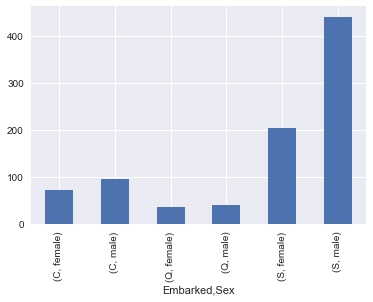

In [223]:
_cross_train.groupby(['Embarked', 'Sex'])['Survived'].count().plot(kind='bar')

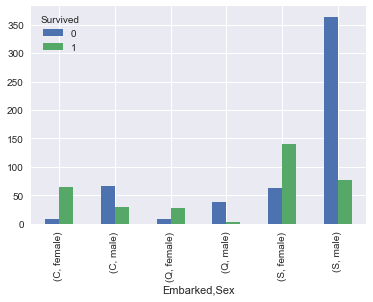

In [227]:
# 個人的にはpivotが見やすい
_cross_train.pivot_table(index=['Embarked', 'Sex'], columns='Survived', values='PassengerId', aggfunc='count').plot(kind='bar')

これはどう解釈すればよい・・・・？

Sで乗った客が多く、男性が多くなくなったため、相関があるっぽい。こういう場合は入れないほうがよい？


In [234]:
# 家族

_cross_train['FamilySize'] = _cross_train['SibSp'] + _cross_train['Parch']
_cross_train['FamilyCategory'] = np.where(_cross_train['FamilySize'] == 0, 'Solo', np.where(_cross_train['FamilySize'] <= 3, 'NuClear', 'Big'))

In [240]:
_cross_train.groupby(['FamilyCategory'], as_index=False)['Survived'].mean()

FamilyCategory  Survived
0            Big  0.161290
1        NuClear  0.578767
2           Solo  0.303538

In [238]:
_cross_train.groupby(['FamilyCategory', 'Sex'], as_index=False)['Survived'].mean()

FamilyCategory     Sex  Survived
0            Big  female  0.272727
1            Big    male  0.034483
2        NuClear  female  0.806452
3        NuClear    male  0.321168
4           Solo  female  0.785714
5           Solo    male  0.155718

In [239]:
_cross_train.groupby(['FamilyCategory', 'Sex'], as_index=False)['Survived'].count()

FamilyCategory     Sex  Survived
0            Big  female        33
1            Big    male        29
2        NuClear  female       155
3        NuClear    male       137
4           Solo  female       126
5           Solo    male       411

### 比較してみる

クロス集計を確認していたけど、比較しないとダメじゃね？ってことに気づいたので確認する

In [36]:
# ランダムフォレストのほうを確認する
pre_core_df = get_correct_and_predict_df(train.loc[:, 'Survived'], model.predict(train.loc[:, target_parameter]))

correct = pre_core_df['correct']
predict = pre_core_df['predict']

# true, positive 生存を当てた
tp = train.iloc[pre_core_df[(correct == predict) & (1 == predict)].index, ]
# true, negative 死亡を当てた
tn = train.iloc[pre_core_df[(correct == predict) & (0 == predict)].index, ]
# false, positive 生存を外した
fp = train.iloc[pre_core_df[(correct != predict) & (0 != predict)].index, ]
# false, negative 死亡を外した
fn = train.iloc[pre_core_df[(correct != predict) & (1 != predict)].index, ]

print(tp['Survived'].count(), ':', tn['Survived'].count(), ':', fp['Survived'].count(), ':', fn['Survived'].count())

284 : 529 : 20 : 58


比較すべきは

* tpとfp  
* tnとfn

でおｋ？

全部比較すると
* tp:fp
* tp:fn
* tn:fp
* tn:fn

となる

### 集計で比較する

In [107]:
# 年齢
diff_age_tp = tp.groupby(tp['Age'] // 5 * 5)['Survived'].count()
diff_age_fp = fp.groupby(fp['Age'] // 5 * 5)['Survived'].count()
diff_age_tn = tn.groupby(tn['Age'] // 5 * 5)['Survived'].count()
diff_age_fn = fn.groupby(fn['Age'] // 5 * 5)['Survived'].count()

diff_cat_age = pd.concat([diff_age_tp, diff_age_fp, diff_age_tn, diff_age_fn], axis=1).fillna(0).astype(int)
diff_cat_age.columns = ['tp', 'fp', 'tn', 'fn']
diff_cat_age

tp  fp   tn  fn
Age                  
0.0   26   2   11   1
5.0   12   1   12   1
10.0   7   0    9   0
15.0  46   2   64   7
20.0  34   2   73   7
25.0  31   6  145  14
30.0  37   1   64  12
35.0  30   1   38   3
40.0  25   2   44   6
45.0  14   1   24   2
50.0  14   1   17   0
55.0   5   1    9   1
60.0   3   0    9   3
65.0   0   0    4   0
70.0   0   0    6   0
80.0   0   0    0   1

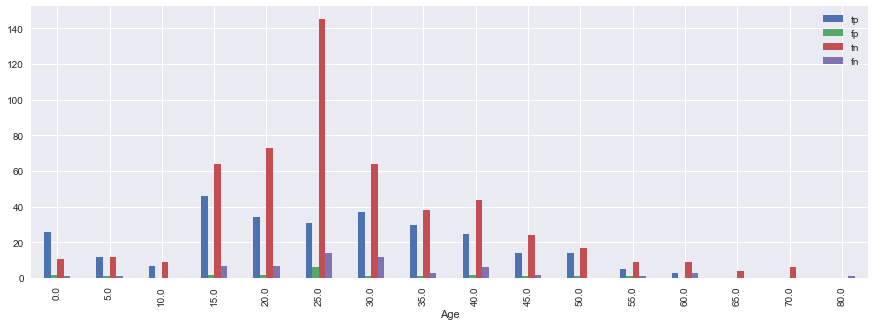

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
diff_cat_age.plot(kind='bar', ax=ax)

ハズレの値が小さくてよくわからん

* 25歳と30歳の死亡を多く外している（fn）
* fpは25歳が大きい(fp)

In [108]:
# 年齢と性別
diff_age_sex_tp = tp.groupby([tp['Age'] // 5 * 5, 'Sex_female'])['Survived'].count()
diff_age_sex_fp = fp.groupby([fp['Age'] // 5 * 5, 'Sex_female'])['Survived'].count()
diff_age_sex_tn = tn.groupby([tn['Age'] // 5 * 5, 'Sex_female'])['Survived'].count()
diff_age_sex_fn = fn.groupby([fn['Age'] // 5 * 5, 'Sex_female'])['Survived'].count()

diff_cat_age_sex = pd.concat([diff_age_sex_tp, diff_age_sex_fp, diff_age_sex_tn, diff_age_sex_fn], axis=1).fillna(0).astype(int)
diff_cat_age_sex.columns = ['tp', 'fp', 'tn', 'fn']
diff_cat_age_sex

tp  fp   tn  fn
Age  Sex_female                 
0.0  0           14   0    8   1
     1           12   2    3   0
5.0  0            6   0    7   0
     1            6   1    5   1
10.0 0            2   0    5   0
     1            5   0    4   0
15.0 0            1   0   45   4
     1           45   2   19   3
20.0 0            0   0   65   7
     1           34   2    8   0
25.0 0           11   3  138  14
     1           20   3    7   0
30.0 0            4   0   56  11
     1           33   1    8   1
35.0 0            8   0   35   2
     1           22   1    3   1
40.0 0            4   1   40   6
     1           21   1    4   0
45.0 0            5   1   19   2
     1            9   0    5   0
50.0 0            3   0   17   0
     1           11   1    0   0
55.0 0            0   0    9   1
     1            5   1    0   0
60.0 0            0   0    9   2
     1            3   0    0   1
65.0 0            0   0    4   0
70.0 0            0   0    6   0
80.0 0            0   0    0   1

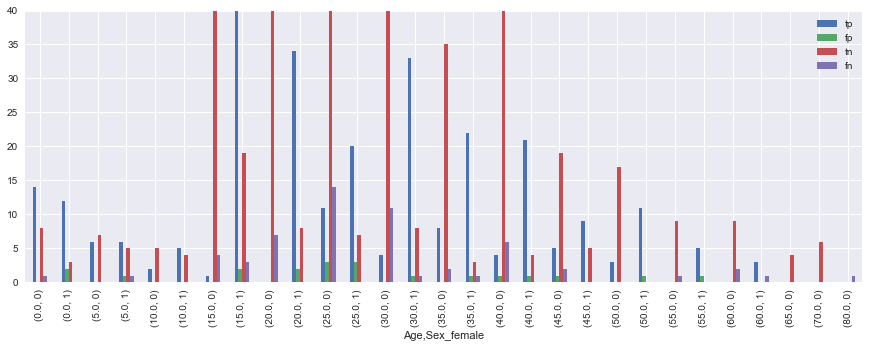

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.ylim(0, 40)
diff_cat_age_sex.plot(kind='bar', ax=ax)

* fpは男性女性ともに25歳が大きい
* fnは20歳, 25歳、30歳, 40歳の男性を多く外している

In [125]:
# 年齢と性別とPclassで集計

diff_age_sex_pclass_tp = tp.groupby([tp['Age'] // 5 * 5, 'Sex_female', 'Pclass_1', 'Pclass_3'])['Survived'].count()
diff_age_sex_pclass_fp = fp.groupby([fp['Age'] // 5 * 5, 'Sex_female', 'Pclass_1', 'Pclass_3'])['Survived'].count()
diff_age_sex_pclass_tn = tn.groupby([tn['Age'] // 5 * 5, 'Sex_female', 'Pclass_1', 'Pclass_3'])['Survived'].count()
diff_age_sex_pclass_fn = fn.groupby([fn['Age'] // 5 * 5, 'Sex_female', 'Pclass_1', 'Pclass_3'])['Survived'].count()

diff_cat_age_pclass_sex = pd.concat([diff_age_sex_pclass_tp, diff_age_sex_pclass_fp, diff_age_sex_pclass_tn, diff_age_sex_pclass_fn], axis=1).fillna(0).astype(int)
diff_cat_age_pclass_sex.columns = ['tp', 'fp', 'tn', 'fn']
diff_cat_age_pclass_sex

tp  fp   tn  fn
Age  Sex_female Pclass_1 Pclass_3                 
0.0  0          0        0          8   0    0   0
                         1          4   0    8   1
                1        0          2   0    0   0
     1          0        0          4   0    0   0
                         1          8   1    3   0
                1        0          0   1    0   0
5.0  0          0        0          1   0    0   0
                         1          5   0    7   0
     1          0        0          4   0    0   0
                         1          2   1    5   1
10.0 0          0        1          1   0    5   0
                1        0          1   0    0   0
     1          0        0          2   0    0   0
                         1          2   0    4   0
                1        0          1   0    0   0
15.0 0          0        0          0   0    9   1
                         1          0   0   33   3
                1        0          1   0    3   0
     1          0        0          6   0    0   0
                         1         27   2   19   3
                1        0         12   0    0   0
20.0 0          0        0          0   0   12   0
                         1          0   0   49   6
                1        0          0   0    4   1
     1          0        0         12   1    0   0
                         1          9   1    8   0
                1        0         13   0    0   0
25.0 0          0        0          0   0   16   0
                         1          3   2  118  14
                1        0          8   1    4   0
...                                ..  ..  ...  ..
40.0 1          0        1          0   0    4   0
                1        0         15   0    0   0
45.0 0          0        0          0   0    3   0
                         1          0   0    6   1
                1        0          5   1   10   1
     1          0        0          3   0    0   0
                         1          0   0    5   0
                1        0          6   0    0   0
50.0 0          0        0          0   0    7   0
                         1          0   0    4   0
                1        0          3   0    6   0
     1          0        0          4   0    0   0
                1        0          7   1    0   0
55.0 0          0        0          0   0    2   0
                         1          0   0    2   0
                1        0          0   0    5   1
     1          0        0          1   1    0   0
                1        0          4   0    0   0
60.0 0          0        0          0   0    1   1
                         1          0   0    1   0
                1        0          0   0    7   1
     1          0        1          0   0    0   1
                1        0          3   0    0   0
65.0 0          0        0          0   0    1   0
                         1          0   0    1   0
                1        0          0   0    2   0
70.0 0          0        0          0   0    1   0
                         1          0   0    2   0
                1        0          0   0    3   0
80.0 0          1        0          0   0    0   1

[79 rows x 4 columns]

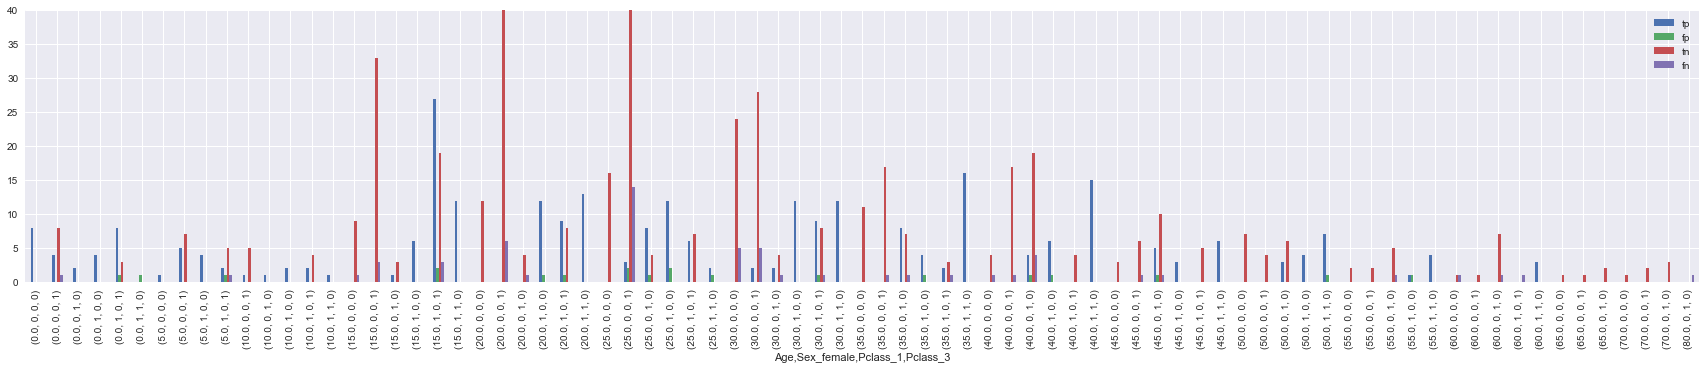

In [128]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.ylim(0, 40)
diff_cat_age_pclass_sex.plot(kind='bar', ax=ax)

In [131]:
# Pclassのみ

diff_pclass_tp = tp.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3'])['Survived'].count()
diff_pclass_fp = fp.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3'])['Survived'].count()
diff_pclass_tn = tn.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3'])['Survived'].count()
diff_pclass_fn = fn.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3'])['Survived'].count()

diff_pclass = pd.concat([diff_pclass_tp, diff_pclass_fp, diff_pclass_tn, diff_pclass_fn], axis=1).fillna(0).astype(int)
diff_pclass.columns = ['tp', 'fp', 'tn', 'fn']
diff_pclass

tp  fp   tn  fn
Pclass_1 Pclass_2 Pclass_3                  
0        0        1          80   8  364  39
         1        0          79   6   91   8
1        0        0         125   6   74  11

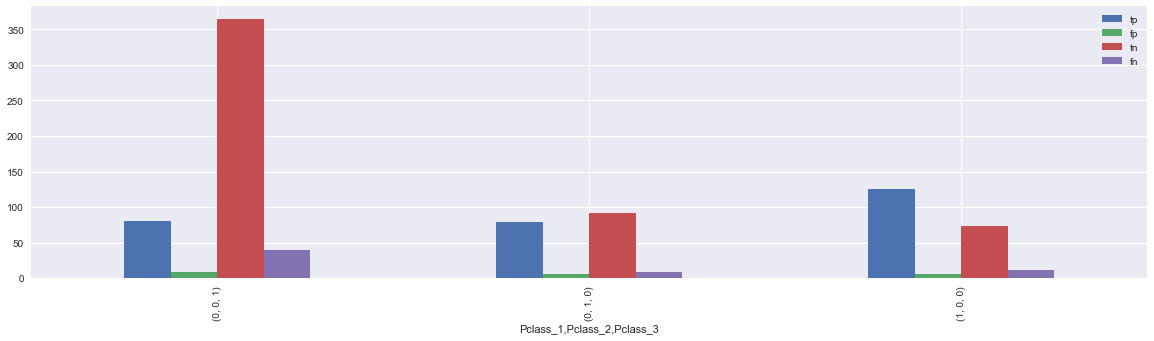

In [134]:
fig, ax = plt.subplots(figsize=(20, 5))
diff_pclass.plot(kind='bar', ax=ax)

Pclass3がいっぱい死んだしかわからん

* Pclass3で多く外している（fn）

In [133]:
# sexとPclass

diff_pclass_sex_tp = tp.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female'])['Survived'].count()
diff_pclass_sex_fp = fp.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female'])['Survived'].count()
diff_pclass_sex_tn = tn.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female'])['Survived'].count()
diff_pclass_sex_fn = fn.groupby(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female'])['Survived'].count()

diff_pclass_sex = pd.concat([diff_pclass_sex_tp, diff_pclass_sex_fp, diff_pclass_sex_tn, diff_pclass_sex_fn], axis=1).fillna(0).astype(int)
diff_pclass_sex.columns = ['tp', 'fp', 'tn', 'fn']
diff_pclass_sex

tp  fp   tn  fn
Pclass_1 Pclass_2 Pclass_3 Sex_female                 
0        0        1        0           15   2  298  32
                           1           65   6   66   7
         1        0        0            9   0   91   8
                           1           70   6    0   0
1        0        0        0           34   3   74  11
                           1           91   3    0   0

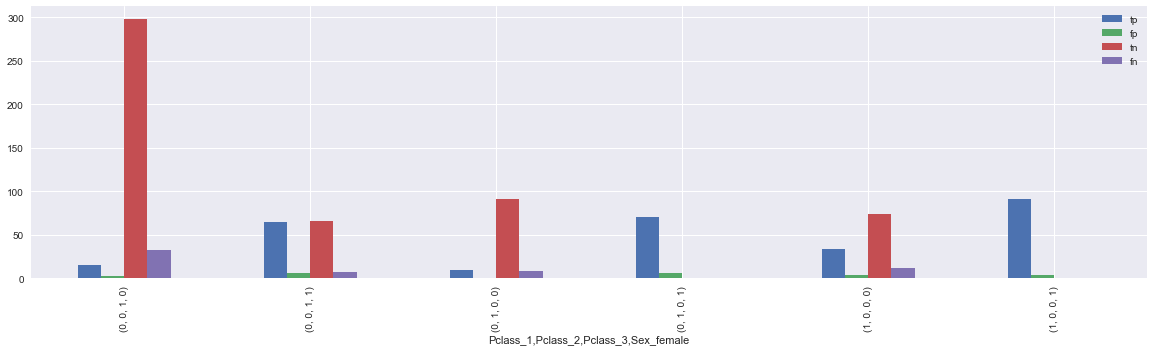

In [135]:
fig, ax = plt.subplots(figsize=(20, 5))
diff_pclass_sex.plot(kind='bar', ax=ax)

* Pclass2の男性はfp無し
* Pclass3の男性の死亡を多く外している

In [136]:
# 年齢と性別とPclass3で集計

diff_age_sex_pclass3_tp = tp.groupby([tp['Age'] // 5 * 5, 'Sex_female', 'Pclass_3'])['Survived'].count()
diff_age_sex_pclass3_fp = fp.groupby([fp['Age'] // 5 * 5, 'Sex_female', 'Pclass_3'])['Survived'].count()
diff_age_sex_pclass3_tn = tn.groupby([tn['Age'] // 5 * 5, 'Sex_female', 'Pclass_3'])['Survived'].count()
diff_age_sex_pclass3_fn = fn.groupby([fn['Age'] // 5 * 5, 'Sex_female', 'Pclass_3'])['Survived'].count()

diff_cat_age_pclass3_sex = pd.concat([diff_age_sex_pclass3_tp, diff_age_sex_pclass3_fp, diff_age_sex_pclass3_tn, diff_age_sex_pclass3_fn], axis=1).fillna(0).astype(int)
diff_cat_age_pclass3_sex.columns = ['tp', 'fp', 'tn', 'fn']
diff_cat_age_pclass3_sex

tp  fp   tn  fn
Age  Sex_female Pclass_3                 
0.0  0          0         10   0    0   0
                1          4   0    8   1
     1          0          4   1    0   0
                1          8   1    3   0
5.0  0          0          1   0    0   0
                1          5   0    7   0
     1          0          4   0    0   0
                1          2   1    5   1
10.0 0          0          1   0    0   0
                1          1   0    5   0
     1          0          3   0    0   0
                1          2   0    4   0
15.0 0          0          1   0   12   1
                1          0   0   33   3
     1          0         18   0    0   0
                1         27   2   19   3
20.0 0          0          0   0   16   1
                1          0   0   49   6
     1          0         25   1    0   0
                1          9   1    8   0
25.0 0          0          8   1   20   0
                1          3   2  118  14
     1          0         14   3    0   0
                1          6   0    7   0
30.0 0          0          2   0   28   6
                1          2   0   28   5
     1          0         24   0    0   0
                1          9   1    8   1
35.0 0          0          8   0   18   1
                1          0   0   17   1
     1          0         20   1    0   0
                1          2   0    3   1
40.0 0          0          4   1   23   5
                1          0   0   17   1
     1          0         21   1    0   0
                1          0   0    4   0
45.0 0          0          5   1   13   1
                1          0   0    6   1
     1          0          9   0    0   0
                1          0   0    5   0
50.0 0          0          3   0   13   0
                1          0   0    4   0
     1          0         11   1    0   0
55.0 0          0          0   0    7   1
                1          0   0    2   0
     1          0          5   1    0   0
60.0 0          0          0   0    8   2
                1          0   0    1   0
     1          0          3   0    0   0
                1          0   0    0   1
65.0 0          0          0   0    3   0
                1          0   0    1   0
70.0 0          0          0   0    4   0
                1          0   0    2   0
80.0 0          0          0   0    0   1

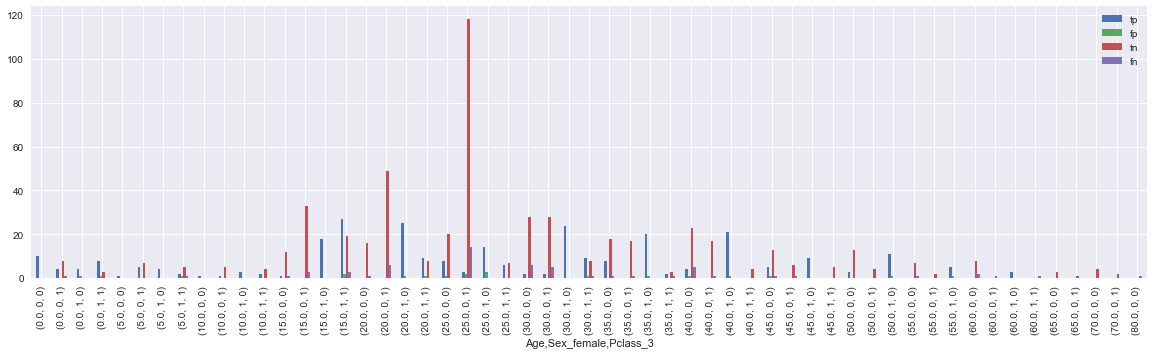

In [138]:
fig, ax = plt.subplots(figsize=(20, 5))
diff_cat_age_pclass3_sex.plot(kind='bar', ax=ax)

* 25歳でPclass3で男性が多く外している？(fn)

In [143]:
# ファミリーサイズで確認

dff_family_size_tp = tp.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big'])['Survived'].count()
diff_family_size_fp = fp.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big'])['Survived'].count()
diff_family_size_tn = tn.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big'])['Survived'].count()
diff_family_size_fn = fn.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big'])['Survived'].count()

diff_family_size = pd.concat([dff_family_size_tp, diff_family_size_fp, diff_family_size_tn, diff_family_size_fn], axis=1).fillna(0).astype(int)
diff_family_size.columns = ['tp', 'fp', 'tn', 'fn']
diff_family_size

tp  fp   tn  fn
Fam_Size_Solo Fam_Size_Nuclear Fam_Size_Big                  
0             0                1               7   0   52   3
              1                0             156   8  115  13
1             0                0             121  12  362  42

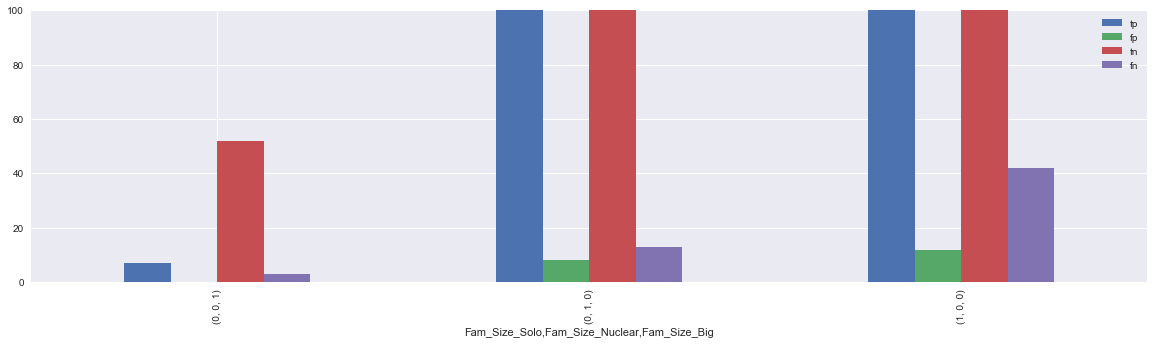

In [146]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.ylim(0, 100)
diff_family_size.plot(kind='bar', ax=ax)

* ソロの人（つまり家族がいなかった人）を多く外したような感じ（fp, fn）
* 1~3人家族もちの人も外している（fp,fn）

In [147]:
# ファミリーサイズ・女性で確認

dff_family_size_sex_tp = tp.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()
diff_family_size_sex_fp = fp.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()
diff_family_size_sex_tn = tn.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()
diff_family_size_sex_fn = fn.groupby(['Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()

diff_family_size_sex = pd.concat([dff_family_size_sex_tp, diff_family_size_sex_fp, diff_family_size_sex_tn, diff_family_size_sex_fn], axis=1).fillna(0).astype(int)
diff_family_size_sex.columns = ['tp', 'fp', 'tn', 'fn']
diff_family_size_sex

tp  fp   tn  fn
Fam_Size_Solo Fam_Size_Nuclear Fam_Size_Big Sex_female                  
0             0                1            0             0   0   28   1
                                            1             7   0   24   2
              1                0            0            33   0   93  11
                                            1           123   8   22   2
1             0                0            0            25   5  342  39
                                            1            96   7   20   3

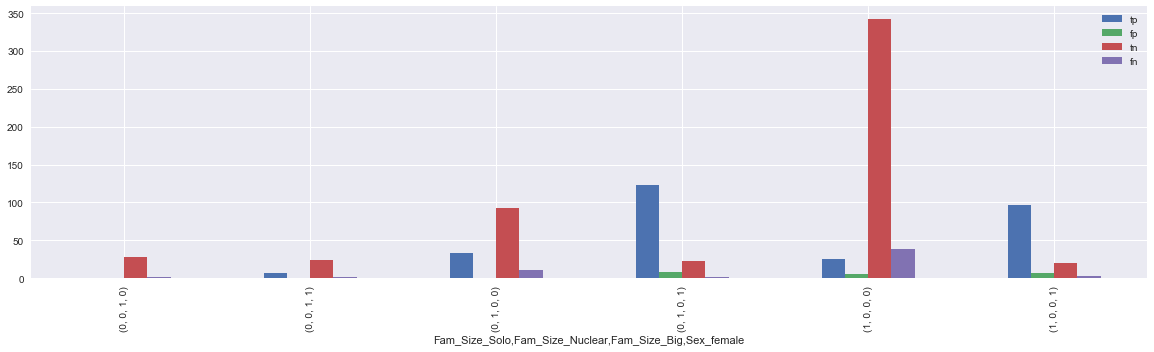

In [148]:
fig, ax = plt.subplots(figsize=(20, 5))
diff_family_size_sex.plot(kind='bar', ax=ax)

* ソロで男性が多く外している(fn）
* ソロで男性と女性の生存外しはほぼおなじぐらい（fp）

In [150]:
# ファミリーサイズ・女性と年齢で確認

dff_age_family_size_sex_tp = tp.groupby([tp['Age'] // 5 * 5, 'Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()
diff_age_family_size_sex_fp = fp.groupby([fp['Age'] // 5 * 5, 'Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()
diff_age_family_size_sex_tn = tn.groupby([tn['Age'] // 5 * 5, 'Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()
diff_age_family_size_sex_fn = fn.groupby([fn['Age'] // 5 * 5, 'Fam_Size_Solo', 'Fam_Size_Nuclear', 'Fam_Size_Big', 'Sex_female'])['Survived'].count()

diff_age_family_size_sex = pd.concat([dff_age_family_size_sex_tp, diff_age_family_size_sex_fp, diff_age_family_size_sex_tn, diff_age_family_size_sex_fn], axis=1).fillna(0).astype(int)
diff_age_family_size_sex.columns = ['tp', 'fp', 'tn', 'fn']
diff_age_family_size_sex

tp  fp  tn  fn
Age  Fam_Size_Solo Fam_Size_Nuclear Fam_Size_Big Sex_female                
0.0  0             0                1            0            0   0   8   1
                                                 1            0   0   3   0
                   1                0            0           14   0   0   0
                                                 1           12   2   0   0
5.0  0             0                1            0            0   0   7   0
                                                 1            0   0   5   1
                   1                0            0            6   0   0   0
                                                 1            5   1   0   0
     1             0                0            1            1   0   0   0
10.0 0             0                1            0            0   0   4   0
                                                 1            0   0   1   0
                   1                0            0            2   0   0   0
                                                 1            4   0   2   0
     1             0                0            0            0   0   1   0
                                                 1            1   0   1   0
15.0 0             0                1            0            0   0   3   0
                                                 1            2   0   7   0
                   1                0            0            1   0  11   0
                                                 1           18   0   6   2
     1             0                0            0            0   0  31   4
                                                 1           25   2   6   1
20.0 0             0                1            1            4   0   1   0
                   1                0            0            0   0   9   3
                                                 1           13   0   2   0
     1             0                0            0            0   0  56   4
                                                 1           17   2   5   0
25.0 0             0                1            0            0   0   3   0
                                                 1            0   0   1   0
                   1                0            0            3   0  27   2
                                                 1           10   3   4   0
...                                                          ..  ..  ..  ..
40.0 0             0                1            0            0   0   1   0
                                                 1            0   0   2   0
                   1                0            0            0   0  10   1
                                                 1           13   1   2   0
     1             0                0            0            4   1  29   5
                                                 1            8   0   0   0
45.0 0             0                1            1            0   0   2   0
                   1                0            0            3   0   3   1
                                                 1            6   0   2   0
     1             0                0            0            2   1  16   1
                                                 1            3   0   1   0
50.0 0             0                1            1            1   0   0   0
                   1                0            0            1   0   6   0
                                                 1            8   0   0   0
     1             0                0            0            2   0  11   0
                                                 1            2   1   0   0
55.0 0             1                0            0            0   0   1   0
                                                 1            2   0   0   0
     1             0                0            0            0   0   8   1
                                                 1            3   1   0   0
60.0 0             0             

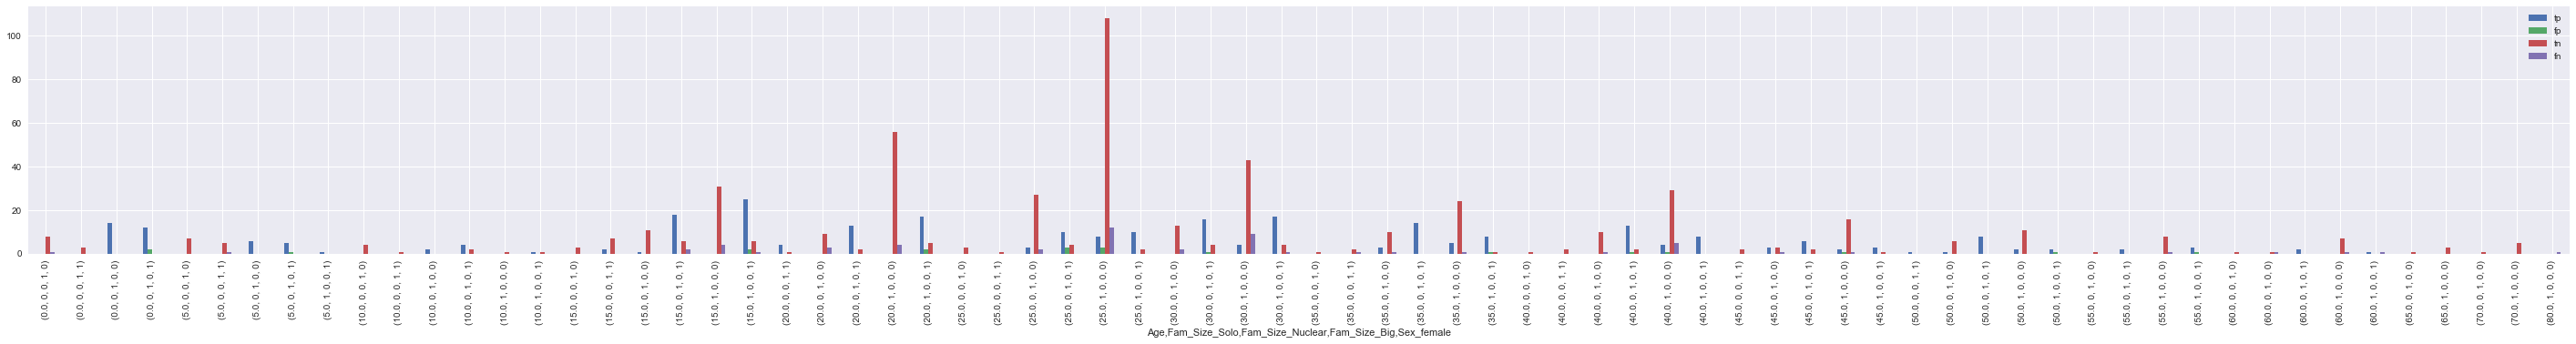

In [154]:
fig, ax = plt.subplots(figsize=(50, 5))
diff_age_family_size_sex.plot(kind='bar', ax=ax)

* 25歳男性ソロ、30歳男性ソロの死亡を外している（fn）

### ここまでをまとめる

* Pclass2の男性はfp無し
* Pclass3の男性の死亡を多く外している
* 25歳でPclass3で男性が多く外している？(fn)
* ソロで男性が多く外している(fn）
* ソロで男性と女性の生存外しはほぼおなじぐらい（fp）
* 25歳男性ソロ、30歳男性ソロの死亡を外している（fn）
* Pclass3で多く外している（fn）
* fpは男性女性ともに25歳が大きい
* fnは20歳, 25歳、30歳, 40歳の男性を多く外している


Pclass3は死亡率高めの印象

### 生存の特徴を探してみる

In [164]:
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [161]:
train_df.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [170]:
train_df[train_df['Age'].isnull() == True]

PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121          122         0       3   
126          127         0       3   
128          129         1       3   
140          141         0       3   
154          155         0       3   
158          159         0       3   
159          160         0       3   
166          167         1       1   
168          169         0       1   
176          177         0       3   
180          181         0       3   
181          182         0       2   
185          186         0       1   
186          187         1       3   
196          197         0       3   
198          199         1       3   
201          202         0       3   
214          215         0       3   
223          224         0       3   
229          230         0       3   
235          236         0       3   
240          241         0       3   
241          242         1       3   
250          251         0       3   
256          257         1       1   
260          261         0       3   
264          265         0       3   
270          271         0       1   
274          275         1       3   
277          278         0       2   
284          285         0       1   
295          296         0       1   
298          299         1       1   
300          301         1       3   
301          302         1       3   
303          304         1       2   
304          305         0       3   
306          307         1       1   
324          325         0       3   
330          331         1       3   
334          335         1       1   
335          336         0       3   
347          348         1       3   
351          352         0       1   
354          355         0       3   
358          359         1       3   
359          360         1       3   
364          365         0       3   
367          368         1       3   
368          369         1       3   
375          376         1       1   
384          385         0       3   
388          389         0       3   
409          410         0       3   
410          411         0       3   
411          412         0       3   
413          414         0       2   
415          416         0       3   
420          421         0       3   
425          426         0       3   
428          429         0       3   
431          432         1       3   
444          445         1       3   
451          452         0       3   
454          455         0       3   
457          458         1       1   
459          460         0       3   
464          465         0       3   
466          467         0       2   
468          469         0       3   
470          471         0       3   
475          476         0       1   
481          482         0       2   
485          486         0       3   
490          491         0       3   
495          496         0       3   
497          498         0       3   
502          503         0       3   
507          508         1       1   
511          51

In [168]:
train_df[train_df['Age'].isnull() == True].groupby('Pclass')['Pclass'].count()

Pclass
1     30
2     11
3    136
Name: Pclass, dtype: int64

In [169]:
train_df[train_df['Age'].isnull() == True].groupby('Pclass')['Survived'].mean()

Pclass
1    0.466667
2    0.363636
3    0.250000
Name: Survived, dtype: float64

In [172]:
train_df[train_df['Ticket'].str.contains('[A-z]')]

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
10            11         1       3   
12            13         0       3   
30            31         0       1   
31            32         1       1   
33            34         0       2   
34            35         0       1   
37            38         0       3   
43            44         1       2   
45            46         0       3   
51            52         0       3   
52            53         1       1   
56            57         1       2   
58            59         1       2   
59            60         0       3   
64            65         0       1   
66            67         1       2   
67            68         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
84            85         1       2   
86            87         0       3   
87            88         0       3   
92            93         0       1   
93            94         0       3   
96            97         0       1   
97            98         1       1   
115          116         0       3   
118          119         0       1   
120          121         0       2   
121          122         0       3   
127          128         1       3   
131          132         0       3   
132          133         0       3   
134          135         0       2   
135          136         0       2   
139          140         0       1   
142          143         1       3   
145          146         0       2   
147          148         0       3   
150          151         0       2   
152          153         0       3   
153          154         0       3   
154          155         0       3   
155          156         0       1   
157          158         0       3   
159          160         0       3   
161          162         1       2   
168          169         0       1   
173          174         0       3   
177          178         0       1   
179          180         0       3   
180          181         0       3   
181          182         0       2   
194          195         1       1   
195          196         1       1   
201          202         0       3   
204          205         1       3   
210          211         0       3   
211          212         1       2   
212          213         0       3   
216          217         1       3   
219          220         0       2   
220          221         1       3   
225          226         0       3   
226          227         1       2   
227          228         0       3   
234          235         0       2   
235          236         0       3   
237          238         1       2   
239          240         0       2   
242          243         0       2   
243          244         0       3   
253          254         0       3   
256          257         1       1   
258          259         1       1   
265          266         0       2   
268          269         1       1   
269          270         1       1   
271          272         1       3   
273          274         0       1   
279          280         1       3   
283          284         1       3   
292          293         0       2   
295          296         0       1   
299          300         1       1   
302          303         0       3   
304          305         0       3   
307          308         1       1   
308          309         0       2   
309          310         1       1   
311          312         1       1   
314          315         0       2   
320          321         0       3   
324          325         0       3   
325          326         1       1   
332          333         0       1   
334          335         1       1   
348          349         1       3   
361          362         0       2   
363          364         0       3   
365          36

In [216]:
train_df[train_df['Ticket'].str.match('[A-z]')]['Ticket'].count()

230

In [238]:
train_df.groupby(['Ticket'])['Survived'].count().sort_values(ascending=False)

Ticket
CA. 2343              7
1601                  7
347082                7
347088                6
CA 2144               6
3101295               6
S.O.C. 14879          5
382652                5
2666                  4
19950                 4
PC 17757              4
17421                 4
347077                4
349909                4
113760                4
LINE                  4
W./C. 6608            4
113781                4
4133                  4
248727                3
SC/Paris 2123         3
C.A. 31921            3
29106                 3
PC 17760              3
F.C.C. 13529          3
PC 17582              3
PC 17755              3
363291                3
345773                3
371110                3
PC 17572              3
347742                3
239853                3
35273                 3
24160                 3
110152                3
C.A. 34651            3
13502                 3
110413                3
230080                3
11668                 2
36928    

In [237]:
train_df.groupby(train_df[train_df['Ticket'].str.match('[0-9]')]['Ticket'])['Survived'].count().sort_values(ascending=False)

Ticket
347082     7
1601       7
3101295    6
347088     6
382652     5
349909     4
113781     4
19950      4
113760     4
17421      4
4133       4
347077     4
2666       4
110152     3
248727     3
230080     3
345773     3
347742     3
24160      3
371110     3
239853     3
363291     3
110413     3
29106      3
35273      3
13502      3
13507      2
11967      2
237736     2
231919     2
364516     2
230433     2
12749      2
19877      2
17474      2
349237     2
358585     2
35281      2
220845     2
19996      2
16966      2
17453      2
19943      2
19928      2
244367     2
239865     2
243847     2
2908       2
3101278    2
31027      2
28403      2
2699       2
2691       2
2678       2
2668       2
2665       2
2661       2
2659       2
2653       2
2651       2
345764     2
26360      2
2627       2
250655     2
347054     2
250649     2
250647     2
250644     2
248738     2
347080     2
11767      2
244252     2
364849     2
230136     2
29750      2
370129     2
11380

In [227]:
train_df[train_df['Ticket'] == '347082']

PassengerId  Survived  Pclass  \
13            14         0       3   
119          120         0       3   
541          542         0       3   
542          543         0       3   
610          611         0       3   
813          814         0       3   
850          851         0       3   

                                                  Name     Sex   Age  SibSp  \
13                         Andersson, Mr. Anders Johan    male  39.0      1   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0      4   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0      1   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
850            Andersson, Master. Sigvard Harald Elias    male   4.0      4   

     Parch  Ticket    Fare Cabin Embarked  
13       5  347082  31.275   NaN        S  
119      2  347082  31.275   NaN        S  
541      2  347082  31.275   NaN        S  
542      2  347082  31.275   NaN        S  
610      5  347082  31.275   NaN        S  
813      2  347082  31.275   NaN        S  
850      2  347082  31.275   NaN        S

In [228]:
train_df[train_df['Ticket'] == '1601']

PassengerId  Survived  Pclass             Name   Sex   Age  SibSp  Parch  \
74            75         1       3    Bing, Mr. Lee  male  32.0      0      0   
169          170         0       3    Ling, Mr. Lee  male  28.0      0      0   
509          510         1       3   Lang, Mr. Fang  male  26.0      0      0   
643          644         1       3  Foo, Mr. Choong  male   NaN      0      0   
692          693         1       3     Lam, Mr. Ali  male   NaN      0      0   
826          827         0       3     Lam, Mr. Len  male   NaN      0      0   
838          839         1       3  Chip, Mr. Chang  male  32.0      0      0   

    Ticket     Fare Cabin Embarked  
74    1601  56.4958   NaN        S  
169   1601  56.4958   NaN        S  
509   1601  56.4958   NaN        S  
643   1601  56.4958   NaN        S  
692   1601  56.4958   NaN        S  
826   1601  56.4958   NaN        S  
838   1601  56.4958   NaN        S

In [229]:
train_df[train_df['Ticket'] == '3101295']

PassengerId  Survived  Pclass                                    Name  \
50            51         0       3              Panula, Master. Juha Niilo   
164          165         0       3            Panula, Master. Eino Viljami   
266          267         0       3               Panula, Mr. Ernesti Arvid   
638          639         0       3  Panula, Mrs. Juha (Maria Emilia Ojala)   
686          687         0       3                Panula, Mr. Jaako Arnold   
824          825         0       3            Panula, Master. Urho Abraham   

        Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
50     male   7.0      4      1  3101295  39.6875   NaN        S  
164    male   1.0      4      1  3101295  39.6875   NaN        S  
266    male  16.0      4      1  3101295  39.6875   NaN        S  
638  female  41.0      0      5  3101295  39.6875   NaN        S  
686    male  14.0      4      1  3101295  39.6875   NaN        S  
824    male   2.0      4      1  3101295  39.6875   NaN        S

In [230]:
train_df[train_df['Ticket'] == '382652']

PassengerId  Survived  Pclass                                  Name  \
16            17         0       3                  Rice, Master. Eugene   
171          172         0       3                  Rice, Master. Arthur   
278          279         0       3                    Rice, Master. Eric   
787          788         0       3             Rice, Master. George Hugh   
885          886         0       3  Rice, Mrs. William (Margaret Norton)   

        Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
16     male   2.0      4      1  382652  29.125   NaN        Q  
171    male   4.0      4      1  382652  29.125   NaN        Q  
278    male   7.0      4      1  382652  29.125   NaN        Q  
787    male   8.0      4      1  382652  29.125   NaN        Q  
885  female  39.0      0      5  382652  29.125   NaN        Q

In [239]:
train_df[train_df['Ticket'] == 'CA. 2343']

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN      8      2  CA. 2343  69.55   NaN        S  
863  NaN      8      2  CA. 2343  69.55   NaN        S

In [252]:
train_df[train_df['Ticket'] == '7534']

PassengerId  Survived  Pclass                           Name   Sex   Age  \
138          139         0       3            Osen, Mr. Olaf Elon  male  16.0   
876          877         0       3  Gustafsson, Mr. Alfred Ossian  male  20.0   

     SibSp  Parch Ticket    Fare Cabin Embarked  
138      0      0   7534  9.2167   NaN        S  
876      0      0   7534  9.8458   NaN        S

In [267]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].sort_values(by=['Fare', 'Ticket'])

PassengerId  Survived  Pclass  \
277          278         0       2   
413          414         0       2   
466          467         0       2   
179          180         0       3   
271          272         1       3   
302          303         0       3   
597          598         0       3   
138          139         0       3   
876          877         0       3   
205          206         0       3   
251          252         0       3   
772          773         0       2   
841          842         0       2   
8              9         1       3   
172          173         1       3   
869          870         1       3   
39            40         1       3   
125          126         1       3   
79            80         1       3   
777          778         1       3   
751          752         1       3   
823          824         1       3   
714          715         0       2   
800          801         0       2   
423          424         0       3   
616          617         0       3   
620          621         0       3   
830          831         1       3   
111          112         0       3   
240          241         0       3   
362          363         0       3   
702          703         0       3   
114          115         0       3   
495          496         0       3   
247          248         1       2   
755          756         1       2   
575          576         0       3   
760          761         0       3   
65            66         1       3   
709          710         1       3   
140          141         0       3   
852          853         0       3   
188          189         0       3   
657          658         0       3   
241          242         1       3   
612          613         1       3   
186          187         1       3   
364          365         0       3   
381          382         1       3   
622          623         1       3   
85            86         1       3   
206          207         0       3   
142          143         1       3   
403          404         0       3   
348          349         1       3   
489          490         1       3   
431          432         1       3   
639          640         0       3   
624          625         0       3   
735          736         0       3   
253          254         0       3   
617          618         0       3   
10            11         1       3   
394          395         1       3   
49            50         0       3   
353          354         0       3   
38            39         0       3   
333          334         0       3   
407          408         1       2   
437          438         1       2   
831          832         1       2   
207          208         1       3   
731          732         0       3   
448          449         1       3   
469          470         1       3   
644          645         1       3   
858          859         1       3   
272          273         1       2   
446          447         1       2   
254          255         0       3   
424          425         0       3   
279          280         1       3   
746          747         0       3   
165          166         1       3   
328          329         1       3   
548          549         0       3   
93            94         0       3   
788          789         1       3   
41            42         0       2   
117          118         0       2   
476          477         0       2   
726          727         1       2   
7              8         0       3   
24            25         0       3   
374          375         0       3   
567          568         0       3   
128          129         1       3   
533          534         1       3   
98            99         1       2   
651          652         1       2   
301          302         1       3   
330          331         1       3   
783          784         0       3   
888          889         0       3   
308          30

* チケット番号が同じという意味はどういう意味だろう？
    * チケット番号が同じな人は金額も一緒
* 家族で同じという人もいる
* 家族情報がすべて0で、名字バラバラだけど金額が同じ => あいのり？
* キャビンが一緒の人もいる

In [282]:
len(train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')])

344

In [284]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 3 to 888
Data columns (total 12 columns):
PassengerId    344 non-null int64
Survived       344 non-null int64
Pclass         344 non-null int64
Name           344 non-null object
Sex            344 non-null object
Age            295 non-null float64
SibSp          344 non-null int64
Parch          344 non-null int64
Ticket         344 non-null object
Fare           344 non-null float64
Cabin          115 non-null object
Embarked       342 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.9+ KB


In [312]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].groupby('Sex')[['Survived']].mean()

Survived
Sex             
female  0.738889
male    0.280488

In [355]:
train_df[(train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last'))].sort_values(by=['Ticket'])

PassengerId  Survived  Pclass  \
257          258         1       1   
759          760         1       1   
504          505         1       1   
262          263         0       1   
558          559         1       1   
585          586         1       1   
110          111         0       1   
475          476         0       1   
523          524         1       1   
329          330         1       1   
166          167         1       1   
356          357         1       1   
829          830         1       1   
61            62         1       1   
390          391         1       1   
802          803         1       1   
435          436         1       1   
763          764         1       1   
151          152         1       1   
336          337         0       1   
498          499         0       1   
708          709         1       1   
297          298         0       1   
305          306         1       1   
383          384         1       1   
35            36         0       1   
270          271         0       1   
842          843         1       1   
3              4         1       1   
137          138         0       1   
724          725         1       1   
809          810         1       1   
117          118         0       2   
41            42         0       2   
248          249         1       1   
871          872         1       1   
310          311         1       1   
879          880         1       1   
291          292         1       1   
484          485         1       1   
520          521         1       1   
820          821         1       1   
275          276         1       1   
627          628         1       1   
765          766         1       1   
577          578         1       1   
434          435         0       1   
692          693         1       3   
838          839         1       3   
74            75         1       3   
169          170         0       3   
509          510         1       3   
826          827         0       3   
643          644         1       3   
319          320         1       1   
337          338         1       1   
550          551         1       1   
698          699         0       1   
306          307         1       1   
581          582         1       1   
453          454         1       1   
849          850         1       1   
690          691         1       1   
781          782         1       1   
290          291         1       1   
741          742         0       1   
245          246         0       1   
412          413         1       1   
224          225         1       1   
486          487         1       1   
88            89         1       1   
438          439         0       1   
341          342         1       1   
27            28         0       1   
712          713         1       1   
669          670         1       1   
615          616         1       2   
754          755         1       2   
193          194         1       2   
340          341         1       2   
148          149         0       2   
183          184         1       2   
618          619         1       2   
880          881         1       2   
259          260         1       2   
98            99         1       2   
651          652         1       2   
9             10         1       2   
122          123         0       2   
413          414         0       2   
277          278         0       2   
466          467         0       2   
20            21         0       2   
791          792         0       2   
779          780         1       1   
689          690         1       1   
730          731         1       1   
217          218         0       2   
600          601         1       2   
249          250         0       2   
854          855         0       2   
99           100         0       2   
316          317         1       2   
848          849         0       2   
720          72

In [337]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].groupby(['Ticket', 'Sex'])[['Survived']].mean()

Survived
Ticket           Sex             
110152           female  1.000000
110413           female  1.000000
                 male    0.000000
110465           male    0.000000
111361           female  1.000000
113505           female  1.000000
113572           female  1.000000
113760           female  1.000000
                 male    1.000000
113776           female  1.000000
                 male    0.000000
113781           female  0.333333
                 male    1.000000
113789           female  1.000000
                 male    0.000000
113798           female  1.000000
                 male    0.000000
113803           female  1.000000
                 male    0.000000
113806           female  1.000000
                 male    1.000000
11668            female  0.000000
                 male    0.000000
11751            female  1.000000
                 male    1.000000
11767            female  1.000000
11967            female  1.000000
                 male    1.000000
12749            female  1.000000
13502            female  1.000000
13507            female  1.000000
                 male    0.000000
1601             male    0.714286
16966            female  1.000000
17421            female  1.000000
                 male    0.500000
17453            female  1.000000
                 male    1.000000
17474            female  1.000000
                 male    1.000000
19877            female  1.000000
                 male    0.000000
19928            female  1.000000
                 male    0.000000
19943            female  1.000000
                 male    1.000000
19950            female  1.000000
                 male    0.000000
19996            female  1.000000
                 male    1.000000
220845           female  1.000000
230080           male    0.666667
230136           female  1.000000
                 male    1.000000
230433           female  1.000000
231919           female  1.000000
237736           female  1.000000
                 male    0.000000
239853           male    0.000000
239865           male    0.000000
24160            female  1.000000
243847           female  1.000000
                 male    0.000000
244252           female  0.000000
                 male    0.000000
244367           female  1.000000
                 male    0.000000
248727           female  1.000000
                 male    0.000000
248738           female  1.000000
                 male    1.000000
250644           female  1.000000
250647           male    0.000000
250649           female  1.000000
                 male    1.000000
250655           female  1.000000
                 male    0.000000
2627             female  0.000000
                 male    0.000000
26360            female  1.000000
2651             female  1.000000
                 male    1.000000
2653             female  1.000000
                 male    1.000000
2659             female  1.000000
                 male    0.000000
2661             male    1.000000
2665             female  0.000000
2666             female  1.000000
2668             female  1.000000
2678             female  0.000000
2691             female  0.000000
2699             male    0.500000
28403            male    0.000000
2908             female  1.000000
                 male    1.000000
29106            female  1.000000
                 male    1.000000
29750            female  1.000000
                 male    0.000000
3101278          female  1.000000
                 male    0.000000
3101295          female  0.000000
                 male    0.000000
31027            female  1.000000
                 male    0.000000
345764           female  0.000000
                 male    0.000000
345773           female  0.000000
                 male    0.000000
347054           female  0.000000
347077           female  1.000000
                 male    0.500000
347080           female  0.000000
                 male    0.000000
347082           female  0.000000
             

In [348]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].groupby(['Ticket', 'Sex'])[['Survived']].count()

Survived
Ticket           Sex             
110152           female         3
110413           female         2
                 male           1
110465           male           2
111361           female         2
113505           female         2
113572           female         2
113760           female         2
                 male           2
113776           female         1
                 male           1
113781           female         3
                 male           1
113789           female         1
                 male           1
113798           female         1
                 male           1
113803           female         1
                 male           1
113806           female         1
                 male           1
11668            female         1
                 male           1
11751            female         1
                 male           1
11767            female         2
11967            female         1
                 male           1
12749            female         2
13502            female         3
13507            female         1
                 male           1
1601             male           7
16966            female         2
17421            female         2
                 male           2
17453            female         1
                 male           1
17474            female         1
                 male           1
19877            female         1
                 male           1
19928            female         1
                 male           1
19943            female         1
                 male           1
19950            female         2
                 male           2
19996            female         1
                 male           1
220845           female         2
230080           male           3
230136           female         1
                 male           1
230433           female         2
231919           female         2
237736           female         1
                 male           1
239853           male           3
239865           male           2
24160            female         3
243847           female         1
                 male           1
244252           female         1
                 male           1
244367           female         1
                 male           1
248727           female         2
                 male           1
248738           female         1
                 male           1
250644           female         2
250647           male           2
250649           female         1
                 male           1
250655           female         1
                 male           1
2627             female         1
                 male           1
26360            female         2
2651             female         1
                 male           1
2653             female         1
                 male           1
2659             female         1
                 male           1
2661             male           2
2665             female         2
2666             female         4
2668             female         2
2678             female         2
2691             female         2
2699             male           2
28403            male           2
2908             female         1
                 male           1
29106            female         1
                 male           2
29750            female         1
                 male           1
3101278          female         1
                 male           1
3101295          female         1
                 male           5
31027            female         1
                 male           1
345764           female         1
                 male           1
345773           female         2
                 male           1
347054           female         2
347077           female         2
                 male           2
347080           female         1
                 male           1
347082           female         5
             

In [308]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].pivot_table(index='Pclass', columns='Ticket', values='PassengerId', aggfunc='count', fill_value=0)

Ticket  110152  110413  110465  111361  113505  113572  113760  113776  \
Pclass                                                                   
1            3       3       2       2       2       2       4       2   
2            0       0       0       0       0       0       0       0   
3            0       0       0       0       0       0       0       0   

Ticket  113781  113789  113798  113803  113806  11668  11751  11767  11967  \
Pclass                                                                       
1            4       2       2       2       2      0      2      2      2   
2            0       0       0       0       0      2      0      0      0   
3            0       0       0       0       0      0      0      0      0   

Ticket  12749  13502  13507  1601  16966  17421  17453  17474  19877  19928  \
Pclass                                                                        
1           2      3      2     0      2      4      2      2      2      2   
2           0      0      0     0      0      0      0      0      0      0   
3           0      0      0     7      0      0      0      0      0      0   

Ticket  19943  19950  19996  220845  230080  230136  230433  231919  237736  \
Pclass                                                                        
1           2      4      2       0       0       0       0       0       0   
2           0      0      0       2       3       2       2       2       2   
3           0      0      0       0       0       0       0       0       0   

Ticket  239853  239865  24160  243847  244252  244367  248727  248738  250644  \
Pclass                                                                          
1            0       0      3       0       0       0       0       0       0   
2            3       2      0       2       2       2       3       2       2   
3            0       0      0       0       0       0       0       0       0   

Ticket  250647  250649  250655  2627  26360  2651  2653  2659  2661  2665  \
Pclass                                                                      
1            0       0       0     0      0     0     0     0     0     0   
2            2       2       2     0      2     0     0     0     0     0   
3            0       0       0     2      0     2     2     2     2     2   

Ticket  2666  2668  2678  2691  2699  28403  2908  29106  29750  3101278  \
Pclass                                                                     
1          0     0     0     0     0      0     0      0      0        0   
2          0     0     0     0     0      2     2      3      2        0   
3          4     2     2     2     2      0     0      0      0        2   

Ticket  3101295  31027  345764  345773  347054  347077  347080  347082  \
Pclass                                                                   
1             0      0       0       0       0       0       0       0   
2             0      2       0       0       0       0       0       0   
3             6      0       2       3       2       4       2       7   

Ticket  347088  347742  349237  349909  35273  35281  358585  363291  364516  \
Pclass                                                                         
1            0       0       0       0      3      2       0       0       0   
2            0       0       0       0      0      0       0       0       0   
3            6       3       2       4      0      0       2       3       2   

Ticket  364849  367226  367230  36928  36947  36973  370129  370365  371110  \
Pclass                                                                        
1            0       0       0      2      2      2       0       0       0   
2            0       0       0      0      0      0       0       0       0   
3            2       2       2      0      0      0       2       2       3   

Ticket  376564  382652  392096  4133  54636  7534  A/4 48871  A/5. 3336  \
Pclass                        

In [285]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].groupby('Embarked')[['Survived']].mean()

Survived
Embarked          
C         0.710843
Q         0.388889
S         0.460581

In [303]:
train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')].groupby('Embarked')[['Survived']].count()

Survived
Embarked          
C               83
Q               18
S              241

In [320]:
# このチケット同じ人は何らかしらの関係があって、そこを外してね？」という仮説を調べる
len(train_df[train_df['PassengerId'].isin(fp['PassengerId'].tolist())])

20

In [330]:
train_df[train_df['PassengerId'].isin(fp['PassengerId'].tolist())]

PassengerId  Survived  Pclass  \
41            42         0       2   
140          141         0       3   
169          170         0       3   
177          178         0       1   
199          200         0       2   
205          206         0       3   
264          265         0       3   
297          298         0       1   
312          313         0       2   
357          358         0       2   
498          499         0       1   
501          502         0       3   
536          537         0       1   
711          712         0       1   
772          773         0       2   
782          783         0       1   
807          808         0       3   
826          827         0       3   
852          853         0       3   
854          855         0       2   

                                                  Name     Sex   Age  SibSp  \
41   Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.0      1   
140                      Boulos, Mrs. Joseph (Sultana)  female   NaN      0   
169                                      Ling, Mr. Lee    male  28.0      0   
177                         Isham, Miss. Ann Elizabeth  female  50.0      0   
199             Yrois, Miss. Henriette ("Mrs Harbeck")  female  24.0      0   
205                         Strom, Miss. Telma Matilda  female   2.0      0   
264                                 Henry, Miss. Delia  female   NaN      0   
297                       Allison, Miss. Helen Loraine  female   2.0      1   
312              Lahtinen, Mrs. William (Anna Sylfven)  female  26.0      1   
357                          Funk, Miss. Annie Clemmer  female  38.0      0   
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0      1   
501                                Canavan, Miss. Mary  female  21.0      0   
536                  Butt, Major. Archibald Willingham    male  45.0      0   
711                                 Klaber, Mr. Herman    male   NaN      0   
772                                  Mack, Mrs. (Mary)  female  57.0      0   
782                             Long, Mr. Milton Clyde    male  29.0      0   
807                    Pettersson, Miss. Ellen Natalia  female  18.0      0   
826                                       Lam, Mr. Len    male   NaN      0   
852                            Boulos, Miss. Nourelain  female   9.0      1   
854      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1   

     Parch       Ticket      Fare    Cabin Embarked  
41       0        11668   21.0000      NaN        S  
140      2         2678   15.2458      NaN        C  
169      0         1601   56.4958      NaN        S  
177      0     PC 17595   28.7125      C49        C  
199      0       248747   13.0000      NaN        S  
205      1       347054   10.4625       G6        S  
264      0       382649    7.7500      NaN        Q  
297      2       113781  151.5500  C22 C26        S  
312      1       250651   26.0000      NaN        S  
357      0       237671   13.0000      NaN        S  
498      2       113781  151.5500  C22 C26        S  
501      0       364846    7.7500      NaN        Q  
536      0       113050   26.5500      B38        S  
711      0       113028   26.5500     C124        S  
772      0  S.O./P.P. 3   10.5000      E77        S  
782      0       113501   30.0000       D6        S  
807      0       347087    7.7750      NaN        S  
826      0         1601   56.4958      NaN        S  
852      1         2678   15.2458      NaN        C  
854      0       244252   26.0000      NaN        S

In [332]:
train_df[train_df['PassengerId'].isin(fp['PassengerId'].tolist())](train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last'))].sort_values(by='Ticket')

PassengerId  Survived  Pclass  \
257          258         1       1   
759          760         1       1   
504          505         1       1   
262          263         0       1   
558          559         1       1   
585          586         1       1   
110          111         0       1   
475          476         0       1   
523          524         1       1   
329          330         1       1   
166          167         1       1   
356          357         1       1   
829          830         1       1   
61            62         1       1   
390          391         1       1   
802          803         1       1   
435          436         1       1   
763          764         1       1   
151          152         1       1   
336          337         0       1   
498          499         0       1   
708          709         1       1   
297          298         0       1   
305          306         1       1   
383          384         1       1   
35            36         0       1   
270          271         0       1   
842          843         1       1   
3              4         1       1   
137          138         0       1   
724          725         1       1   
809          810         1       1   
117          118         0       2   
41            42         0       2   
248          249         1       1   
871          872         1       1   
310          311         1       1   
879          880         1       1   
291          292         1       1   
484          485         1       1   
520          521         1       1   
820          821         1       1   
275          276         1       1   
627          628         1       1   
765          766         1       1   
577          578         1       1   
434          435         0       1   
692          693         1       3   
838          839         1       3   
74            75         1       3   
169          170         0       3   
509          510         1       3   
826          827         0       3   
643          644         1       3   
319          320         1       1   
337          338         1       1   
550          551         1       1   
698          699         0       1   
306          307         1       1   
581          582         1       1   
453          454         1       1   
849          850         1       1   
690          691         1       1   
781          782         1       1   
290          291         1       1   
741          742         0       1   
245          246         0       1   
412          413         1       1   
224          225         1       1   
486          487         1       1   
88            89         1       1   
438          439         0       1   
341          342         1       1   
27            28         0       1   
712          713         1       1   
669          670         1       1   
615          616         1       2   
754          755         1       2   
193          194         1       2   
340          341         1       2   
148          149         0       2   
183          184         1       2   
618          619         1       2   
880          881         1       2   
259          260         1       2   
98            99         1       2   
651          652         1       2   
9             10         1       2   
122          123         0       2   
413          414         0       2   
277          278         0       2   
466          467         0       2   
20            21         0       2   
791          792         0       2   
779          780         1       1   
689          690         1       1   
730          731         1       1   
217          218         0       2   
600          601         1       2   
249          250         0       2   
854          855         0       2   
99           100         0       2   
316          317         1       2   
848          849         0       2   
720          72

In [326]:
len(train_df[train_df['PassengerId'].isin(fn['PassengerId'].tolist())])

58

In [329]:
train_df[train_df['PassengerId'].isin(fn['PassengerId'].tolist())]

PassengerId  Survived  Pclass  \
17            18         1       2   
21            22         1       2   
25            26         1       3   
36            37         1       3   
55            56         1       1   
81            82         1       3   
97            98         1       1   
107          108         1       3   
127          128         1       3   
146          147         1       3   
192          193         1       3   
204          205         1       3   
207          208         1       3   
209          210         1       1   
220          221         1       3   
224          225         1       1   
226          227         1       2   
233          234         1       3   
261          262         1       3   
267          268         1       3   
271          272         1       3   
283          284         1       3   
286          287         1       3   
288          289         1       2   
301          302         1       3   
338          339         1       3   
391          392         1       3   
400          401         1       3   
414          415         1       3   
429          430         1       3   
444          445         1       3   
455          456         1       3   
483          484         1       3   
510          511         1       3   
543          544         1       2   
547          548         1       2   
553          554         1       3   
569          570         1       3   
570          571         1       2   
579          580         1       3   
587          588         1       1   
621          622         1       1   
622          623         1       3   
630          631         1       1   
647          648         1       1   
664          665         1       3   
673          674         1       2   
677          678         1       3   
690          691         1       1   
712          713         1       1   
744          745         1       3   
762          763         1       3   
797          798         1       3   
804          805         1       3   
821          822         1       3   
828          829         1       3   
830          831         1       3   
839          840         1       1   

                                                  Name     Sex   Age  SibSp  \
17                        Williams, Mr. Charles Eugene    male   NaN      0   
21                               Beesley, Mr. Lawrence    male  34.0      0   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
36                                    Mamee, Mr. Hanna    male   NaN      0   
55                                   Woolner, Mr. Hugh    male   NaN      0   
81                         Sheerlinck, Mr. Jan Baptist    male  29.0      0   
97                     Greenfield, Mr. William Bertram    male  23.0      0   
107                             Moss, Mr. Albert Johan    male   NaN      0   
127                          Madsen, Mr. Fridtjof Arne    male  24.0      0   
146       Andersson, Mr. August Edvard ("Wennerstrom")    male  27.0      0   
192    Andersen-Jensen, Miss. Carla Christine Nielsine  female  19.0      1   
204                           Cohen, Mr. Gurshon "Gus"    male  18.0      0   
207                        Albimona, Mr. Nassef Cassem    male  26.0      0   
209                                   Blank, Mr. Henry    male  40.0      0   
220                     Sunderland, Mr. Victor Francis    male  16.0      0   
224                       Hoyt, Mr. Frederick Maxfield    male  38.0      1   
226                          Mellors, Mr. William John    male  19.0      0   
233                     Asplund, Miss. Lillian Gertrud  female   5.0      4   
261                  Asplund, Master. Edvin Rojj Felix    male   3.0      4   
267                           Persson, Mr. Ernst Ulrik    male  25.0      1   
271                       Tornquist, Mr. William Henry    male  25.0      0   
283                     

In [331]:
train_df[(train_df['PassengerId'].isin(fn['PassengerId'].tolist())) & (train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last'))].sort_values(by='Ticket')

PassengerId  Survived  Pclass  \
690          691         1       1   
224          225         1       1   
712          713         1       1   
622          623         1       3   
830          831         1       3   
207          208         1       3   
543          544         1       2   
25            26         1       3   
233          234         1       3   
261          262         1       3   
301          302         1       3   
271          272         1       3   

                                                  Name     Sex   Age  SibSp  \
690                            Dick, Mr. Albert Adrian    male  31.0      1   
224                       Hoyt, Mr. Frederick Maxfield    male  38.0      1   
712                           Taylor, Mr. Elmer Zebley    male  48.0      1   
622                                   Nakid, Mr. Sahid    male  20.0      1   
830            Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0      1   
207                        Albimona, Mr. Nassef Cassem    male  26.0      0   
543                                  Beane, Mr. Edward    male  32.0      1   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
233                     Asplund, Miss. Lillian Gertrud  female   5.0      4   
261                  Asplund, Master. Edvin Rojj Felix    male   3.0      4   
301                                 McCoy, Mr. Bernard    male   NaN      2   
271                       Tornquist, Mr. William Henry    male  25.0      0   

     Parch  Ticket     Fare Cabin Embarked  
690      0   17474  57.0000   B20        S  
224      0   19943  90.0000   C93        S  
712      0   19996  52.0000  C126        S  
622      1    2653  15.7417   NaN        C  
830      0    2659  14.4542   NaN        C  
207      0    2699  18.7875   NaN        C  
543      0    2908  26.0000   NaN        S  
25       5  347077  31.3875   NaN        S  
233      2  347077  31.3875   NaN        S  
261      2  347077  31.3875   NaN        S  
301      0  367226  23.2500   NaN        Q  
271      0    LINE   0.0000   NaN        S

外した全部がそうではない感じ

In [374]:
duplicate_sex_count = train_df[train_df['Ticket'].duplicated() | train_df['Ticket'].duplicated(keep='last')] \
    .groupby(['Ticket', 'Sex'])[['PassengerId']] \
    .count()

In [378]:
duplicate_sex_count_reset_index = duplicate_sex_count.reset_index()

In [397]:
duplicate_sex_count_reset_index

Ticket     Sex  PassengerId
0              110152  female            3
1              110413  female            2
2              110413    male            1
3              110465    male            2
4              111361  female            2
5              113505  female            2
6              113572  female            2
7              113760  female            2
8              113760    male            2
9              113776  female            1
10             113776    male            1
11             113781  female            3
12             113781    male            1
13             113789  female            1
14             113789    male            1
15             113798  female            1
16             113798    male            1
17             113803  female            1
18             113803    male            1
19             113806  female            1
20             113806    male            1
21              11668  female            1
22              11668    male            1
23              11751  female            1
24              11751    male            1
25              11767  female            2
26              11967  female            1
27              11967    male            1
28              12749  female            2
29              13502  female            3
30              13507  female            1
31              13507    male            1
32               1601    male            7
33              16966  female            2
34              17421  female            2
35              17421    male            2
36              17453  female            1
37              17453    male            1
38              17474  female            1
39              17474    male            1
40              19877  female            1
41              19877    male            1
42              19928  female            1
43              19928    male            1
44              19943  female            1
45              19943    male            1
46              19950  female            2
47              19950    male            2
48              19996  female            1
49              19996    male            1
50             220845  female            2
51             230080    male            3
52             230136  female            1
53             230136    male            1
54             230433  female            2
55             231919  female            2
56             237736  female            1
57             237736    male            1
58             239853    male            3
59             239865    male            2
60              24160  female            3
61             243847  female            1
62             243847    male            1
63             244252  female            1
64             244252    male            1
65             244367  female            1
66             244367    male            1
67             248727  female            2
68             248727    male            1
69             248738  female            1
70             248738    male            1
71             250644  female            2
72             250647    male            2
73             250649  female            1
74             250649    male            1
75             250655  female            1
76             250655    male            1
77               2627  female            1
78               2627    male            1
79              26360  female            2
80               2651  female            1
81               2651    male            1
82               2653  female            1
83               2653    male            1
84               2659  female            1
85               2659    male            1
86               2661    male            2
87               2665  female            2
88               2666  female            4
89               2668  female            2
90               2678  female            2
91               2691  female            2
92              

In [391]:
duplicate_ticket_sex = duplicate_sex_count_reset_index.pivot_table(index='Ticket', columns='Sex', values='PassengerId', aggfunc='count', fill_value=0).reset_index()

In [396]:
duplicate_ticket_sex

Sex            Ticket  female  male
0              110152       1     0
1              110413       1     1
2              110465       0     1
3              111361       1     0
4              113505       1     0
5              113572       1     0
6              113760       1     1
7              113776       1     1
8              113781       1     1
9              113789       1     1
10             113798       1     1
11             113803       1     1
12             113806       1     1
13              11668       1     1
14              11751       1     1
15              11767       1     0
16              11967       1     1
17              12749       1     0
18              13502       1     0
19              13507       1     1
20               1601       0     1
21              16966       1     0
22              17421       1     1
23              17453       1     1
24              17474       1     1
25              19877       1     1
26              19928       1     1
27              19943       1     1
28              19950       1     1
29              19996       1     1
30             220845       1     0
31             230080       0     1
32             230136       1     1
33             230433       1     0
34             231919       1     0
35             237736       1     1
36             239853       0     1
37             239865       0     1
38              24160       1     0
39             243847       1     1
40             244252       1     1
41             244367       1     1
42             248727       1     1
43             248738       1     1
44             250644       1     0
45             250647       0     1
46             250649       1     1
47             250655       1     1
48               2627       1     1
49              26360       1     0
50               2651       1     1
51               2653       1     1
52               2659       1     1
53               2661       0     1
54               2665       1     0
55               2666       1     0
56               2668       1     0
57               2678       1     0
58               2691       1     0
59               2699       0     1
60              28403       0     1
61               2908       1     1
62              29106       1     1
63              29750       1     1
64            3101278       1     1
65            3101295       1     1
66              31027       1     1
67             345764       1     1
68             345773       1     1
69             347054       1     0
70             347077       1     1
71             347080       1     1
72             347082       1     1
73             347088       1     1
74             347742       1     1
75             349237       1     1
76             349909       1     1
77              35273       1     1
78              35281       0     1
79             358585       0     1
80             363291       1     1
81             364516       1     0
82             364849       1     1
83             367226       1     1
84             367230       1     0
85              36928       1     0
86              36947       1     0
87              36973       1     1
88             370129       1     1
89             370365       1     1
90             371110       1     1
91             376564       1     1
92             382652       1     1
93             392096       1     1
94               4133       1     1
95              54636       0     1
96               7534       0     1
97          A/4 48871       0     1
98          A/5. 3336       1     1
99          C.A. 2315       0     1
100         C.A. 2673       1     1
101        C.A. 31921       1     1
102        C.A. 33112       0     1
103        C.A. 34651       1     1
104        C.A. 37671       0     1
105           CA 2144       1     1
106          CA. 2343       1     1
107      F.C.C. 13529       1     1
108              LINE       0     1
109         P/PP 3381       1     1
110 

In [395]:
male_only = duplicate_ticket_sex[(duplicate_ticket_sex['female'] == 0) & (duplicate_ticket_sex['male'] == 1)]

In [398]:
female_only = duplicate_ticket_sex[(duplicate_ticket_sex['female'] == 1) & (duplicate_ticket_sex['male'] == 0)]

In [399]:
male_female = duplicate_ticket_sex[(duplicate_ticket_sex['female'] == 1) & (duplicate_ticket_sex['male'] == 1)]

In [409]:
# 男性だけの相乗り（？）
train_df[train_df['Ticket'].isin(male_only['Ticket'].tolist())]

PassengerId  Survived  Pclass  \
20            21         0       2   
65            66         1       3   
72            73         0       2   
74            75         1       3   
93            94         0       3   
102          103         0       1   
110          111         0       1   
120          121         0       2   
124          125         0       1   
138          139         0       3   
139          140         0       1   
145          146         0       2   
148          149         0       2   
169          170         0       3   
179          180         0       3   
193          194         1       2   
207          208         1       3   
271          272         1       3   
277          278         0       2   
302          303         0       3   
340          341         1       2   
348          349         1       3   
385          386         0       2   
397          398         0       2   
413          414         0       2   
466          467         0       2   
475          476         0       1   
489          490         1       3   
509          510         1       3   
549          550         1       2   
565          566         0       3   
575          576         0       3   
582          583         0       2   
597          598         0       3   
624          625         0       3   
643          644         1       3   
655          656         0       2   
665          666         0       2   
692          693         1       3   
709          710         1       3   
714          715         0       2   
731          732         0       3   
735          736         0       3   
760          761         0       3   
788          789         1       3   
789          790         0       1   
791          792         0       2   
800          801         0       2   
811          812         0       3   
817          818         0       2   
826          827         0       3   
827          828         1       2   
838          839         1       3   
876          877         0       3   

                                                  Name   Sex   Age  SibSp  \
20                                Fynney, Mr. Joseph J  male  35.0      0   
65                            Moubarek, Master. Gerios  male   NaN      1   
72                                Hood, Mr. Ambrose Jr  male  21.0      0   
74                                       Bing, Mr. Lee  male  32.0      0   
93                             Dean, Mr. Bertram Frank  male  26.0      1   
102                          White, Mr. Richard Frasar  male  21.0      0   
110                     Porter, Mr. Walter Chamberlain  male  47.0      0   
120                        Hickman, Mr. Stanley George  male  21.0      2   
124                        White, Mr. Percival Wayland  male  54.0      0   
138                                Osen, Mr. Olaf Elon  male  16.0      0   
139                                 Giglio, Mr. Victor  male  24.0      0   
145                       Nicholls, Mr. Joseph Charles  male  19.0      1   
148           Navratil, Mr. Michel ("Louis M Hoffman")  male  36.5      0   
169                                      Ling, Mr. Lee  male  28.0      0   
179                                Leonard, Mr. Lionel  male  36.0      0   
193                         Navratil, Master. Michel M  male   3.0      1   
207                        Albimona, Mr. Nassef Cassem  male  26.0      0   
271                       Tornquist, Mr. William Henry  male  25.0      0   
277                        Parkes, Mr. Francis "Frank"  male   NaN      0   
302                    Johnson, Mr. William Cahoone Jr  male  19.0      0   
340                     Navratil, Master. Edmond Roger  male   2.0      1   
348             Coutts, Master. William Loch "William"  male   3.0      1   
385                          Davies, Mr. Charles Henry  male  18.0      0   
397                            McKane, Mr. Peter David  male  46.0

In [410]:
# 女性だけのあいのり
train_df[train_df['Ticket'].isin(female_only['Ticket'].tolist())]

PassengerId  Survived  Pclass  \
10            11         1       3   
31            32         1       1   
61            62         1       1   
79            80         1       3   
98            99         1       2   
111          112         0       3   
128          129         1       3   
140          141         0       3   
166          167         1       1   
195          196         1       1   
205          206         0       3   
240          241         0       3   
241          242         1       3   
251          252         0       3   
257          258         1       1   
259          260         1       2   
272          273         1       2   
275          276         1       1   
310          311         1       1   
311          312         1       1   
318          319         1       1   
319          320         1       1   
329          330         1       1   
337          338         1       1   
356          357         1       1   
362          363         0       3   
369          370         1       1   
394          395         1       3   
446          447         1       2   
448          449         1       3   
469          470         1       3   
496          497         1       1   
504          505         1       1   
506          507         1       2   
520          521         1       1   
523          524         1       1   
530          531         1       2   
533          534         1       3   
591          592         1       1   
612          613         1       3   
615          616         1       2   
627          628         1       1   
641          642         1       1   
644          645         1       3   
651          652         1       2   
689          690         1       1   
702          703         0       3   
730          731         1       1   
742          743         1       1   
754          755         1       2   
759          760         1       1   
765          766         1       1   
777          778         1       3   
779          780         1       1   
820          821         1       1   
829          830         1       1   
852          853         0       3   
856          857         1       1   
858          859         1       3   
879          880         1       1   
880          881         1       2   

                                                  Name     Sex    Age  SibSp  \
10                     Sandstrom, Miss. Marguerite Rut  female   4.00      1   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female    NaN      1   
61                                 Icard, Miss. Amelie  female  38.00      0   
79                            Dowdell, Miss. Elizabeth  female  30.00      0   
98                Doling, Mrs. John T (Ada Julia Bone)  female  34.00      0   
111                               Zabour, Miss. Hileni  female  14.50      1   
128                                  Peter, Miss. Anna  female    NaN      1   
140                      Boulos, Mrs. Joseph (Sultana)  female    NaN      0   
166             Chibnall, Mrs. (Edith Martha Bowerman)  female    NaN      0   
195                               Lurette, Miss. Elise  female  58.00      0   
205                         Strom, Miss. Telma Matilda  female   2.00      0   
240                              Zabour, Miss. Thamine  female    NaN      1   
241                     Murphy, Miss. Katherine "Kate"  female    NaN      1   
251         Strom, Mrs. Wilhelm (Elna Matilda Persson)  female  29.00      1   
257                               Cherry, Miss. Gladys  female  30.00      0   
259                        Parrish, Mrs. (Lutie Davis)  female  50.00      0   
272          Mellinger, Mrs. (Elizabeth Anne Maidment)  female  41.00      0   
275                  Andrews, Miss. Kornelia Theodosia  female  63.00      1   
310                     Hays, Miss. Margaret Bechstein  female  24.00      0   
311                         Ryerson, Miss. Emily

In [411]:
# 男性＆女性
train_df[train_df['Ticket'].isin(male_female['Ticket'].tolist())]

PassengerId  Survived  Pclass  \
3              4         1       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
13            14         0       3   
16            17         0       3   
24            25         0       3   
25            26         1       3   
27            28         0       1   
34            35         0       1   
35            36         0       1   
38            39         0       3   
39            40         1       3   
41            42         0       2   
43            44         1       2   
49            50         0       3   
50            51         0       3   
52            53         1       1   
58            59         1       2   
59            60         0       3   
62            63         0       1   
63            64         0       3   
71            72         0       3   
78            79         1       2   
85            86         1       3   
86            87         0       3   
88            89         1       1   
99           100         0       2   
109          110         1       3   
114          115         0       3   
117          118         0       2   
118          119         0       1   
119          120         0       3   
122          123         0       2   
125          126         1       3   
137          138         0       1   
142          143         1       3   
147          148         0       3   
151          152         1       1   
159          160         0       3   
164          165         0       3   
165          166         1       3   
167          168         0       3   
171          172         0       3   
172          173         1       3   
176          177         0       3   
180          181         0       3   
182          183         0       3   
183          184         1       2   
186          187         1       3   
188          189         0       3   
201          202         0       3   
206          207         0       3   
215          216         1       1   
217          218         0       2   
224          225         1       1   
229          230         0       3   
230          231         1       1   
233          234         1       3   
237          238         1       2   
245          246         0       1   
247          248         1       2   
248          249         1       1   
249          250         0       2   
253          254         0       3   
254          255         0       3   
258          259         1       1   
261          262         1       3   
262          263         0       1   
266          267         0       3   
268          269         1       1   
269          270         1       1   
270          271         0       1   
278          279         0       3   
279          280         1       3   
290          291         1       1   
291          292         1       1   
297          298         0       1   
299          300         1       1   
301          302         1       3   
305          306         1       1   
306          307         1       1   
307          308         1       1   
308          309         0       2   
309          310         1       1   
314          315         0       2   
316          317         1       2   
323          324         1       2   
324          325         0       3   
325          326         1       1   
328          329         1       3   
330          331         1       3   
332          333         0       1   
333          334         0       3   
334          335         1       1   
336          337         0       1   
341          342         1       1   
353          354         0       3   
360          361         0       3   
364          365         0       3   
373          374         0       1   
374          375         0       3   
375          376         1       1   
380          381         1       1   
381          38

In [413]:
train_df[train_df['Ticket'].isin(male_only['Ticket'].tolist())].groupby(['Sex'])[['Survived']].mean()

Survived
Sex           
male  0.296296

In [414]:
train_df[train_df['Ticket'].isin(female_only['Ticket'].tolist())].groupby(['Sex'])[['Survived']].mean()

Survived
Sex             
female  0.868852

In [415]:
train_df[train_df['Ticket'].isin(male_female['Ticket'].tolist())].groupby(['Sex'])[['Survived']].mean()

Survived
Sex             
female  0.672269
male    0.272727

重くなってきたので、別レポートへ